## CycleGAN

In [2]:
import torch
from CycleGAN.data.data_loader import TestDataSet
from CycleGAN.model.cycle_gan import CycleGAN
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torch import Tensor
import matplotlib.pyplot as plt
%matplotlib notebook
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np

### Define parameters

In [4]:
models_prefix = "./CycleGAN/model/saved_models/test_"
data_dir = "./CycleGAN/data/"
models_dir = "./CycleGAN/model/saved_models/test_"

image_size = [400, 600]
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### Define model

In [5]:
cycle_gan = CycleGAN(device, models_dir, train=False)

Starting Cycle Gan with Train = False and Semi Supervised = False


### Load model

In [6]:
dataset = TestDataSet(data_root=data_dir, image_size=(image_size[0], image_size[1]))
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

path :  ./CycleGAN/data/
train_names =  7
names :  7


In [7]:
def myimshow(image, ax=plt):
    image = image.to('cpu').numpy()
    image = np.moveaxis(image, [0, 1, 2], [2, 0, 1]) 
    image = (image + 1) / 2
    image[image < 0] = 0
    image[image > 1] = 1
    h = ax.imshow(image)
    ax.axis('off')
    return h

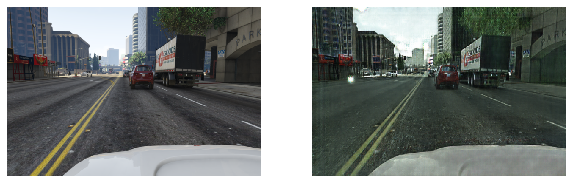

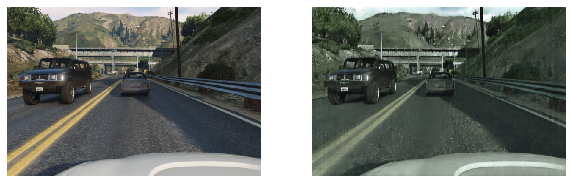

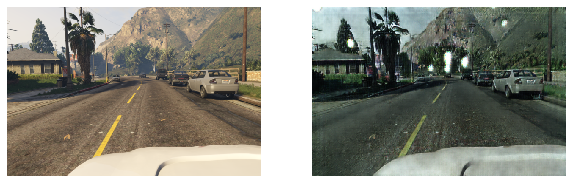

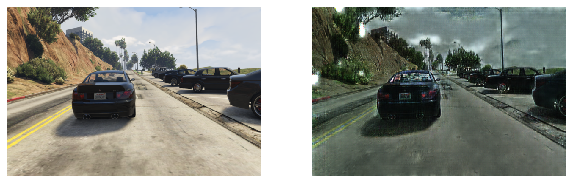

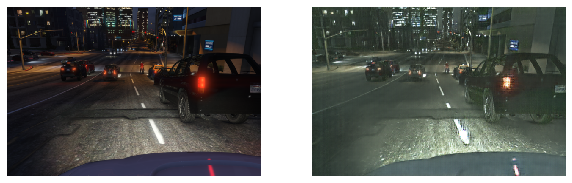

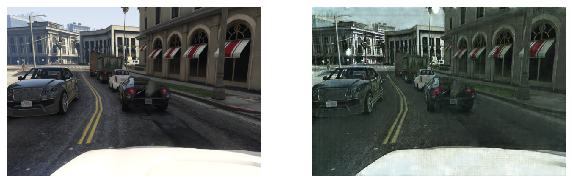

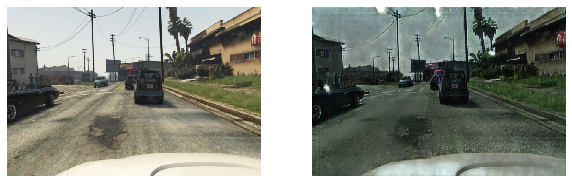

In [9]:
for i,data in enumerate(dataloader):
    
    x = Variable(data.type(Tensor))

    cycle_gan.set_input(x, x)
    cycle_gan.test()
    gen_image = cycle_gan.get_generated_image()
    #print(data.shape)
    #print(gen_image.shape)
    
    fig, (ax1,ax2) = plt.subplots(ncols=2)
    fig.set_figheight(5)
    fig.set_figwidth(10)
    
    myimshow(data[0], ax=ax1)
    myimshow(gen_image[0], ax=ax2)



### Segmantic Segmented Outputs using OC Net trained on augmented dataset

> NOTE : Kindly refer to the README.md to run the net on the testing dataset using run_resnet101_baseline.sh

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

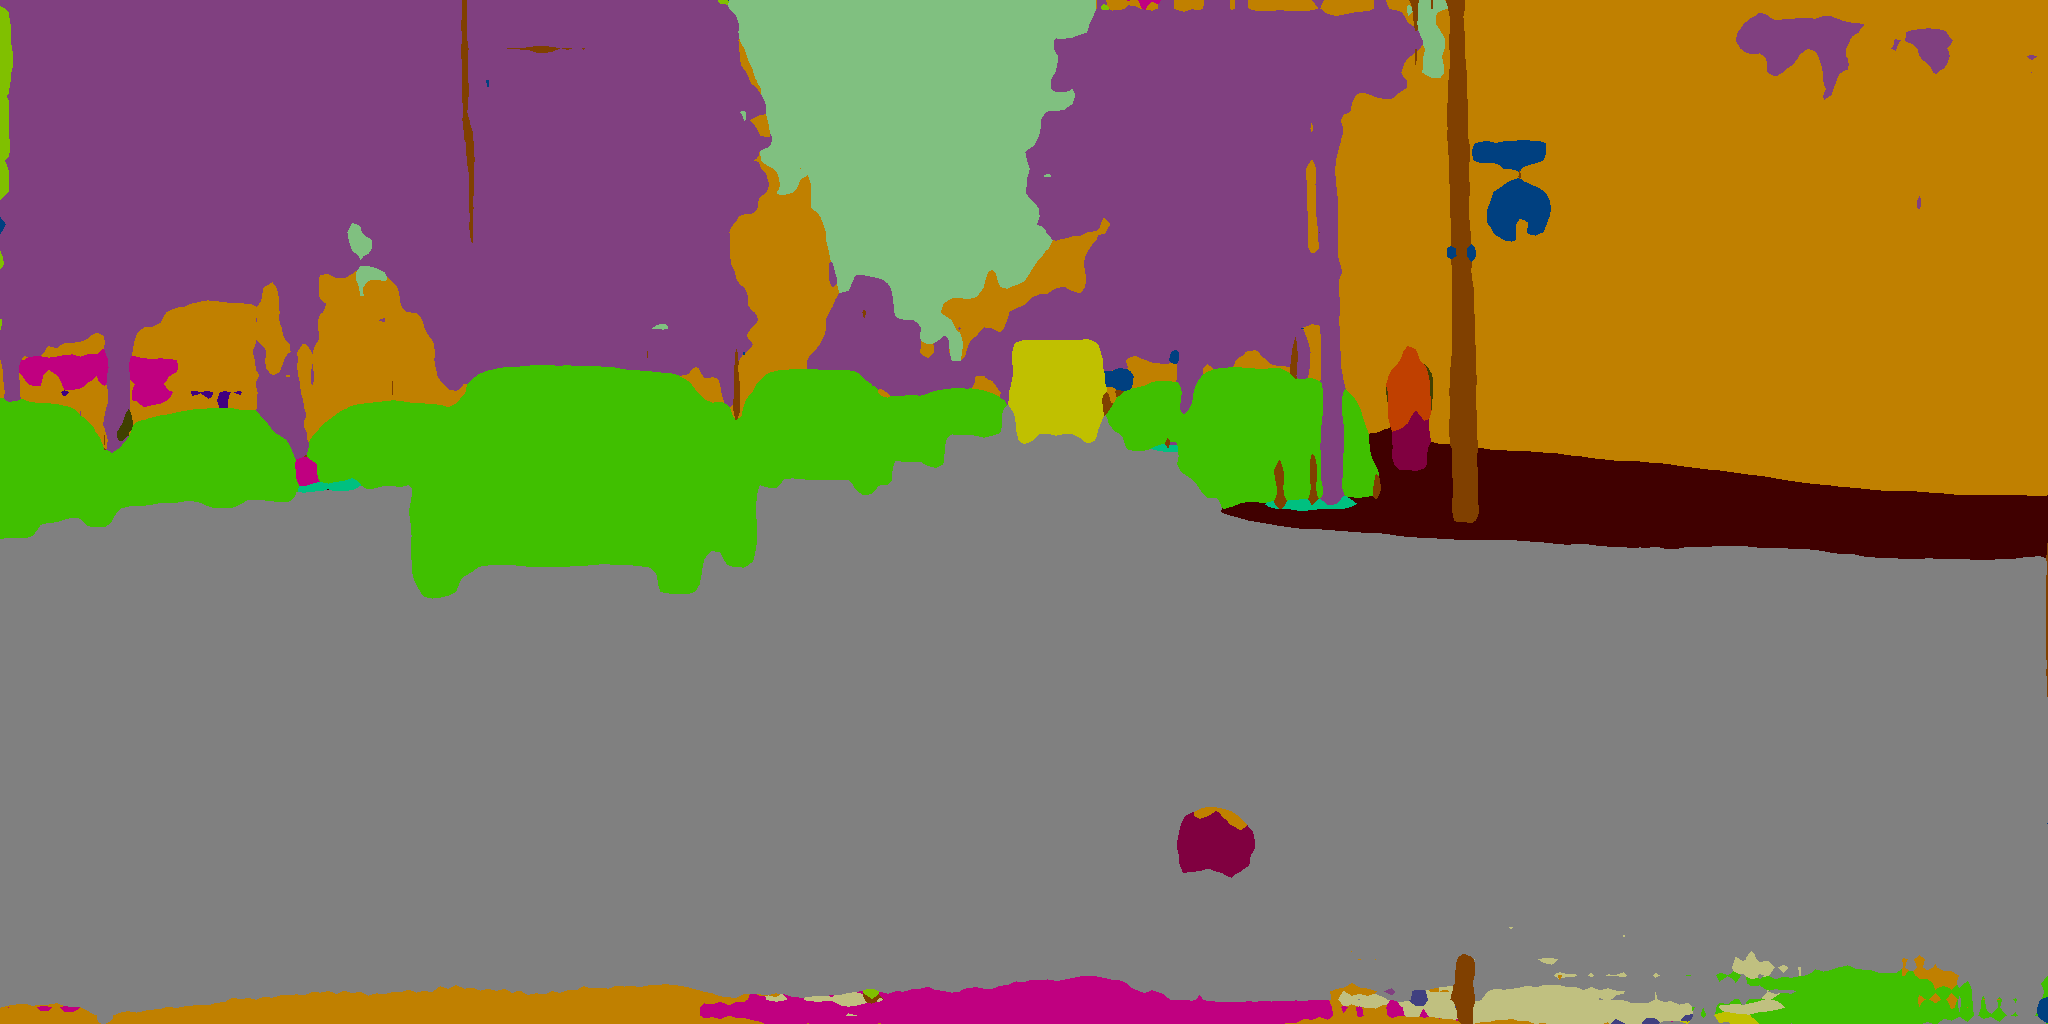

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/frankfurt_000000_018797_leftImg8bit.png


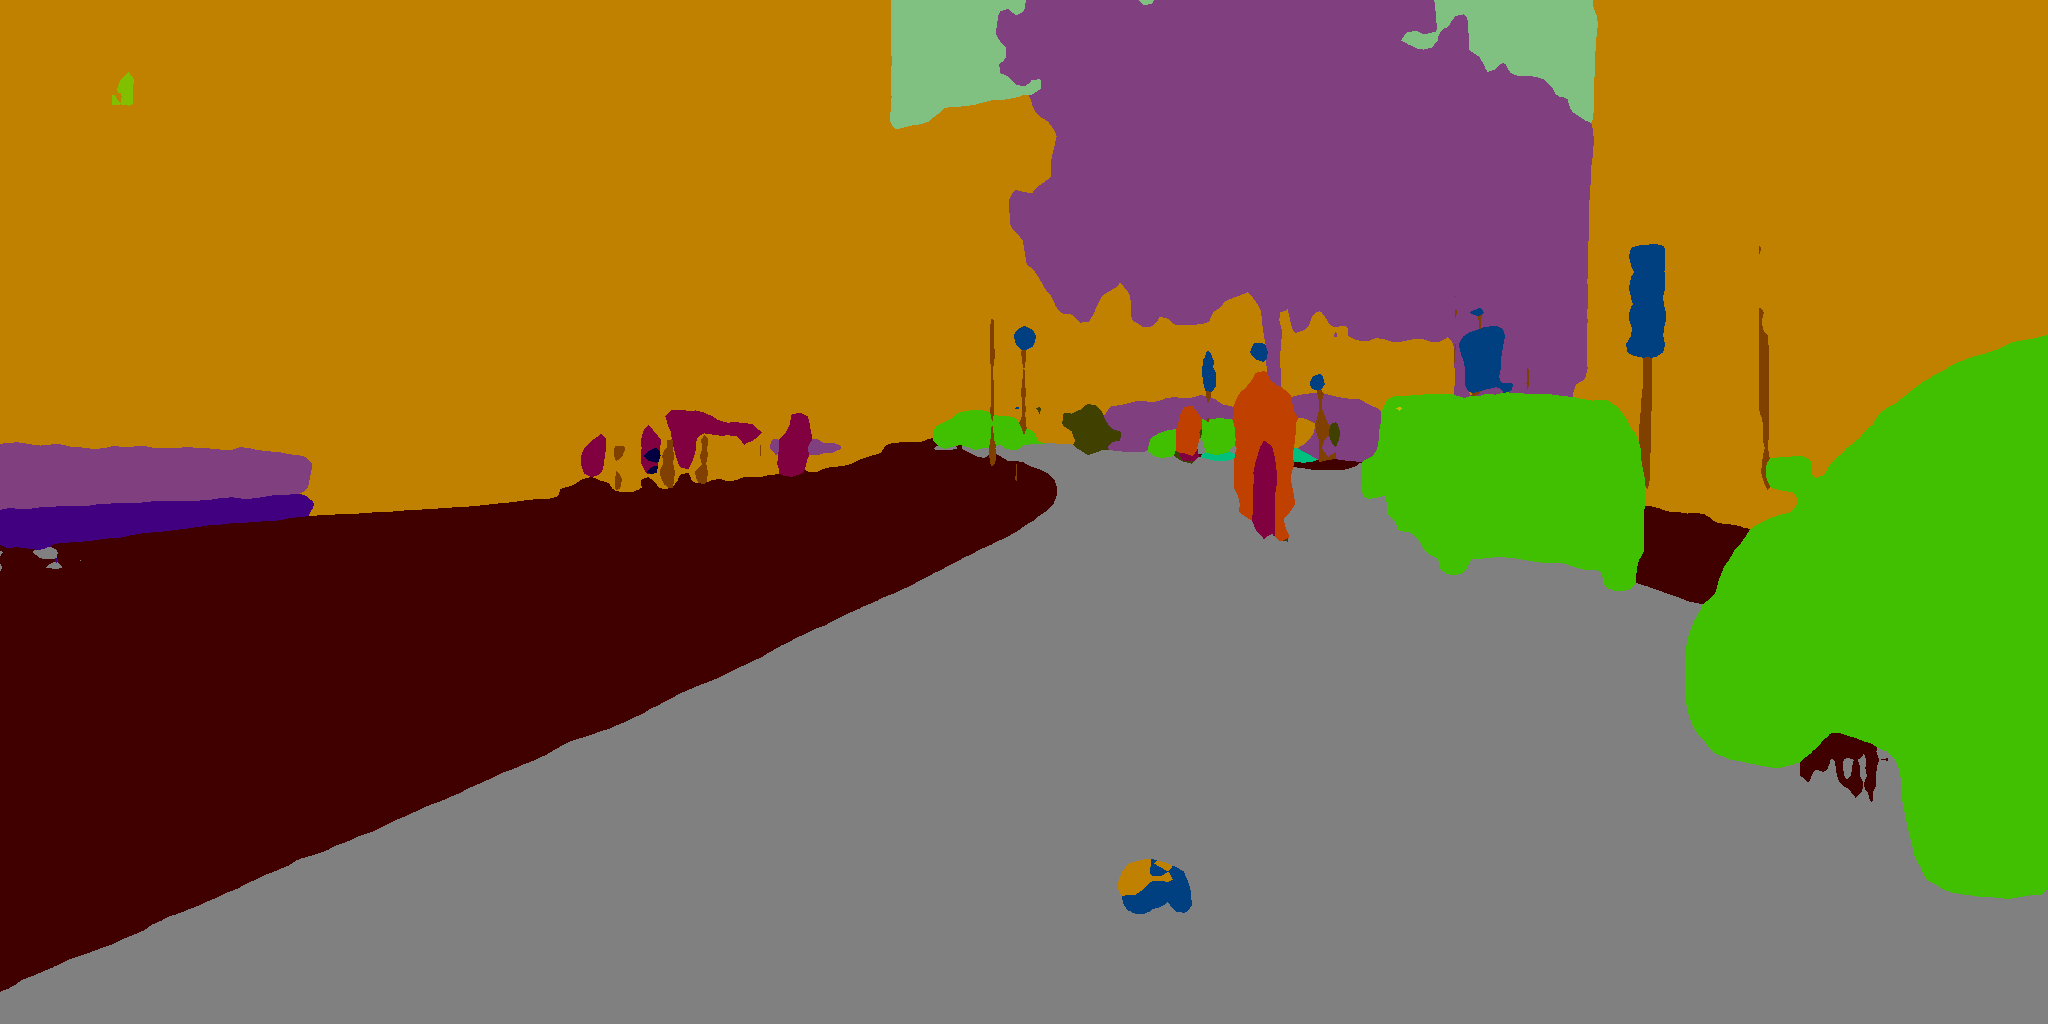

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/munster_000152_000019_leftImg8bit.png


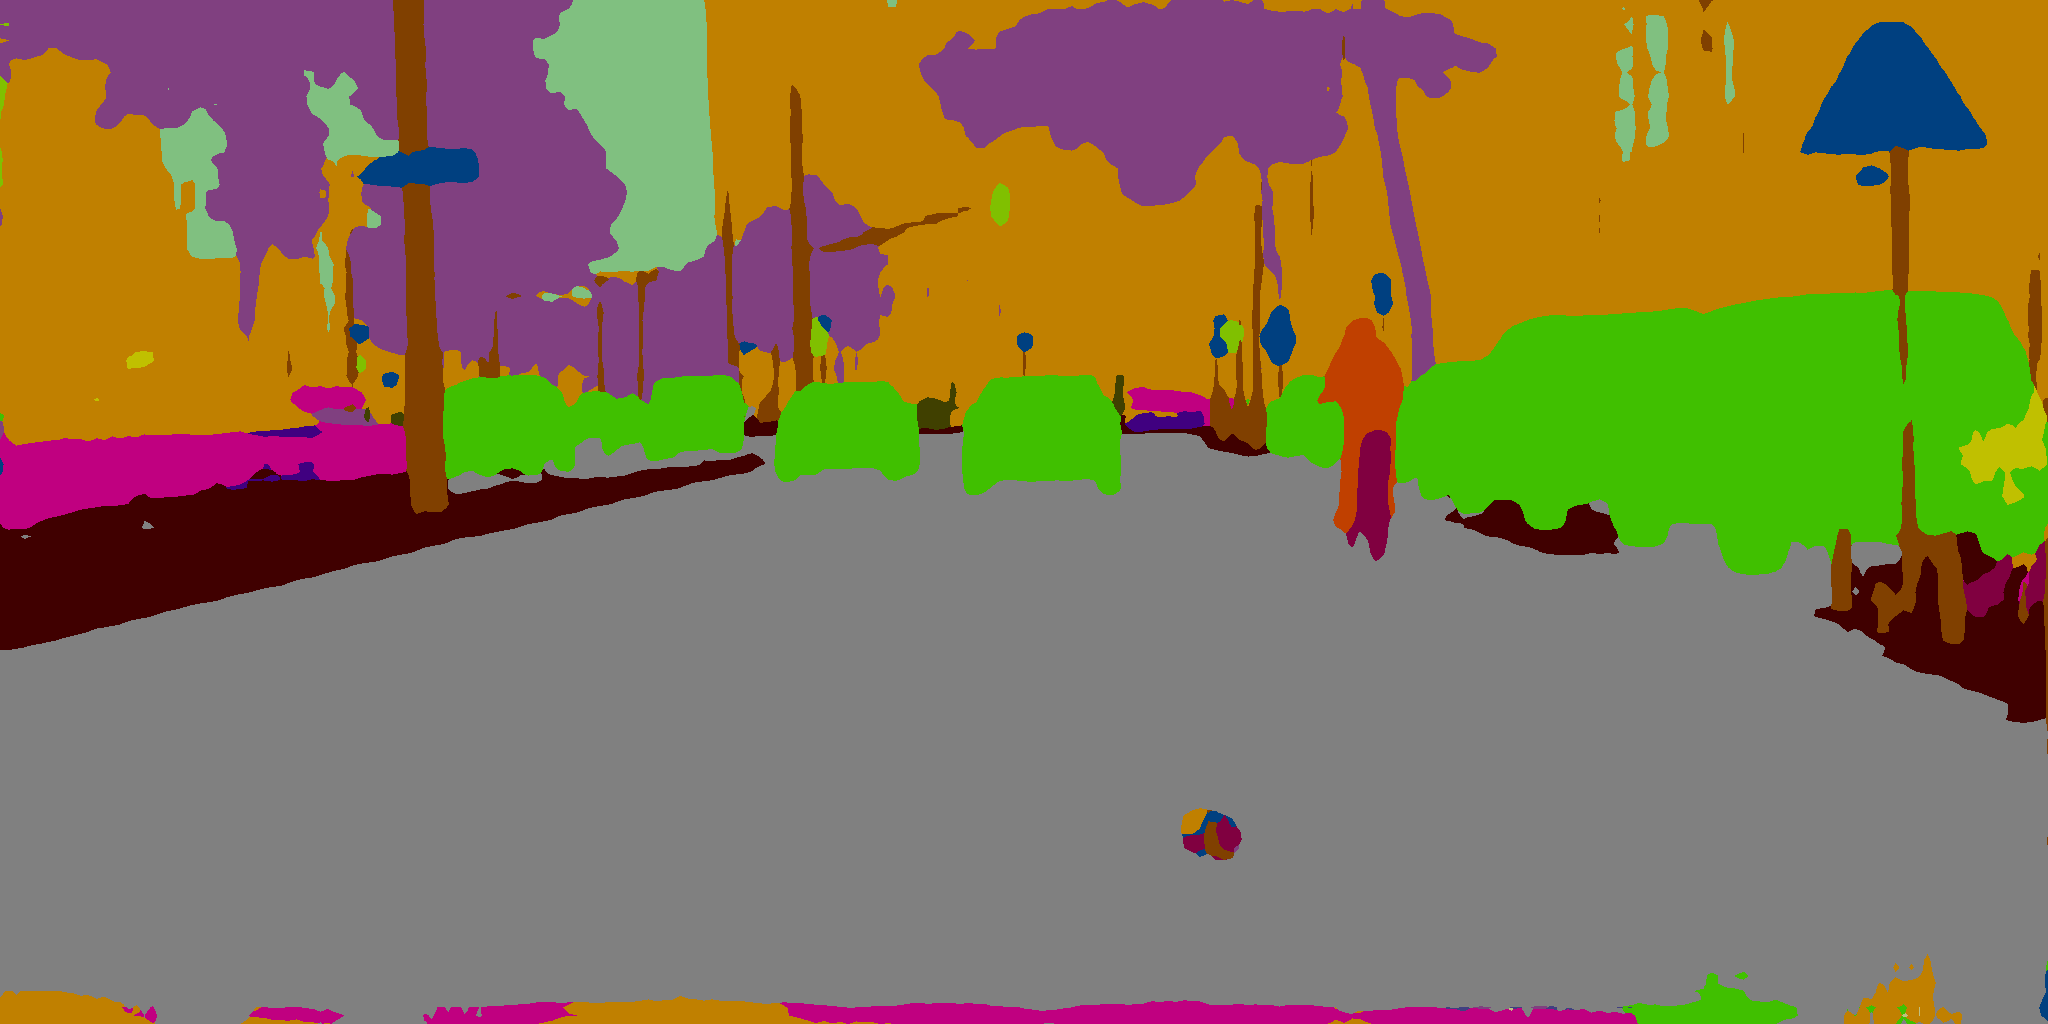

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/frankfurt_000000_015676_leftImg8bit.png


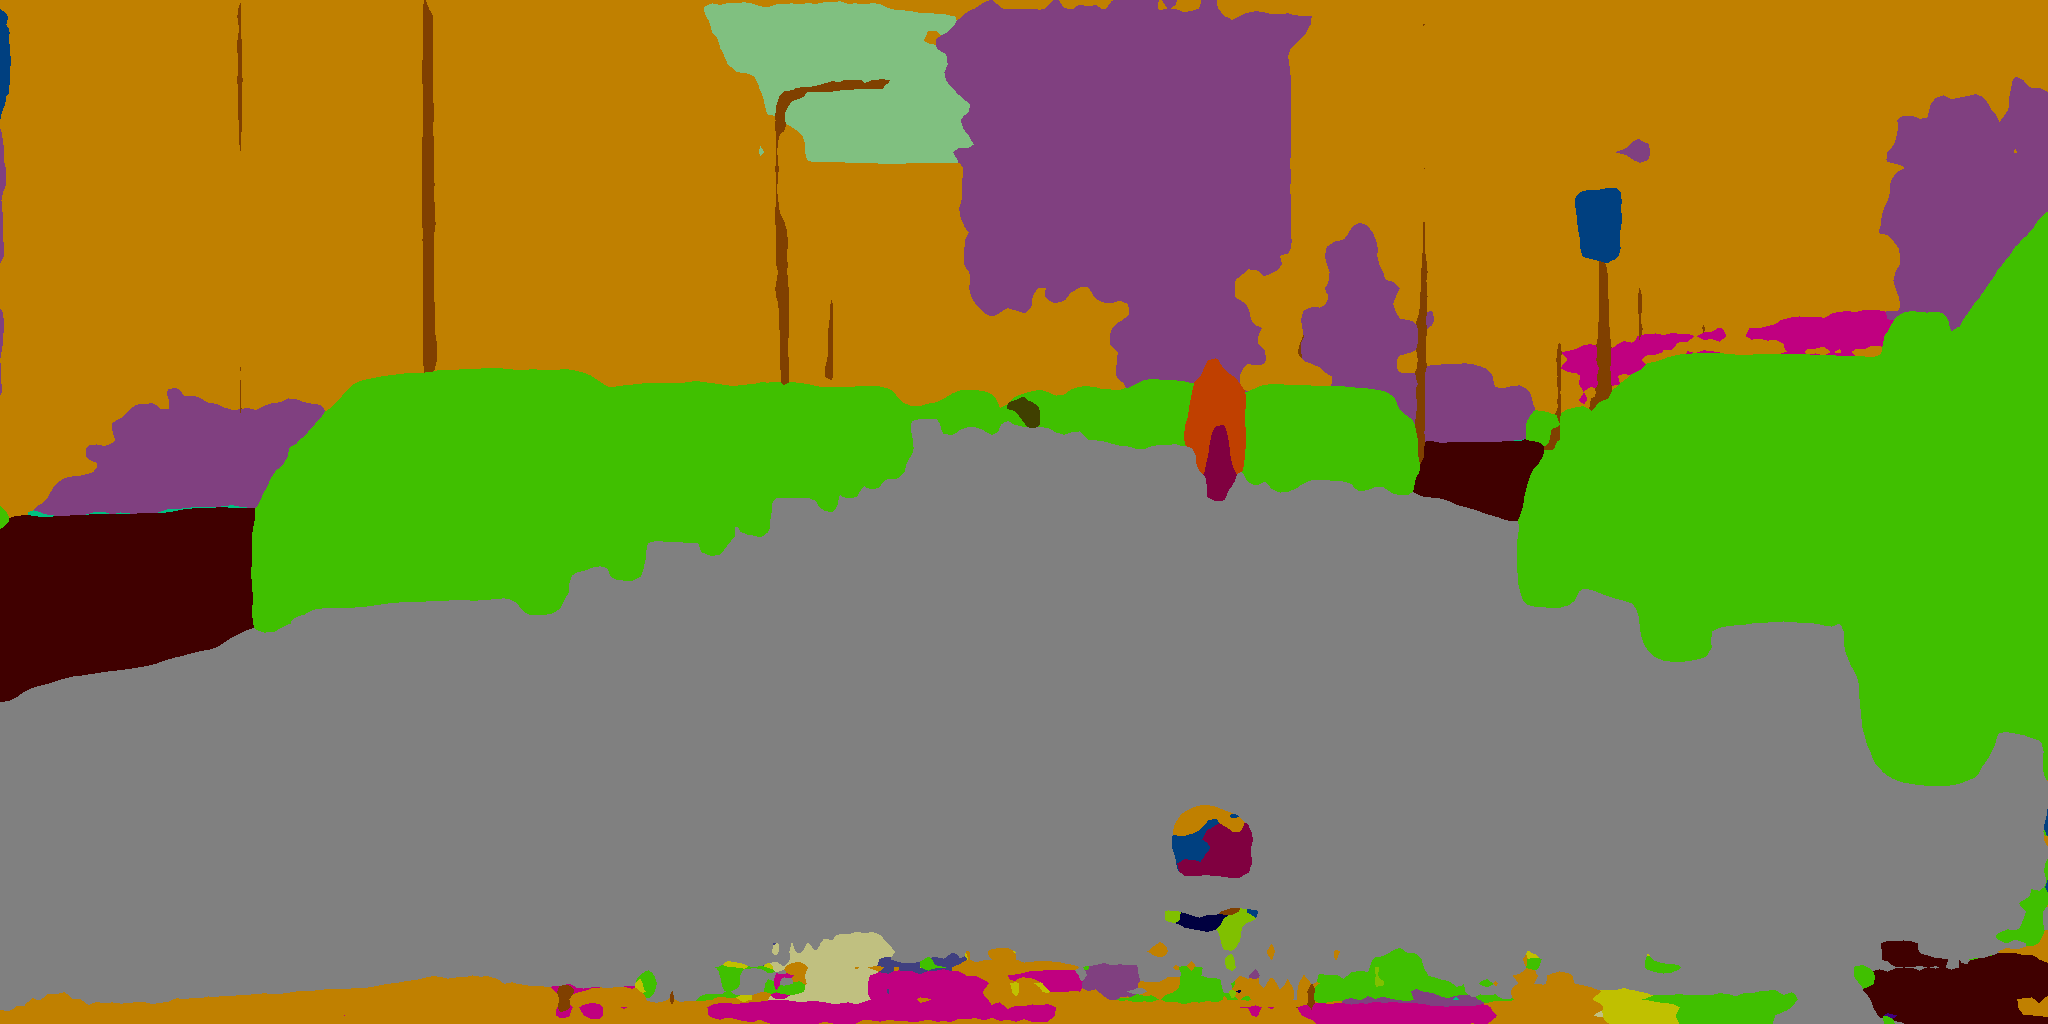

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/frankfurt_000000_000576_leftImg8bit.png


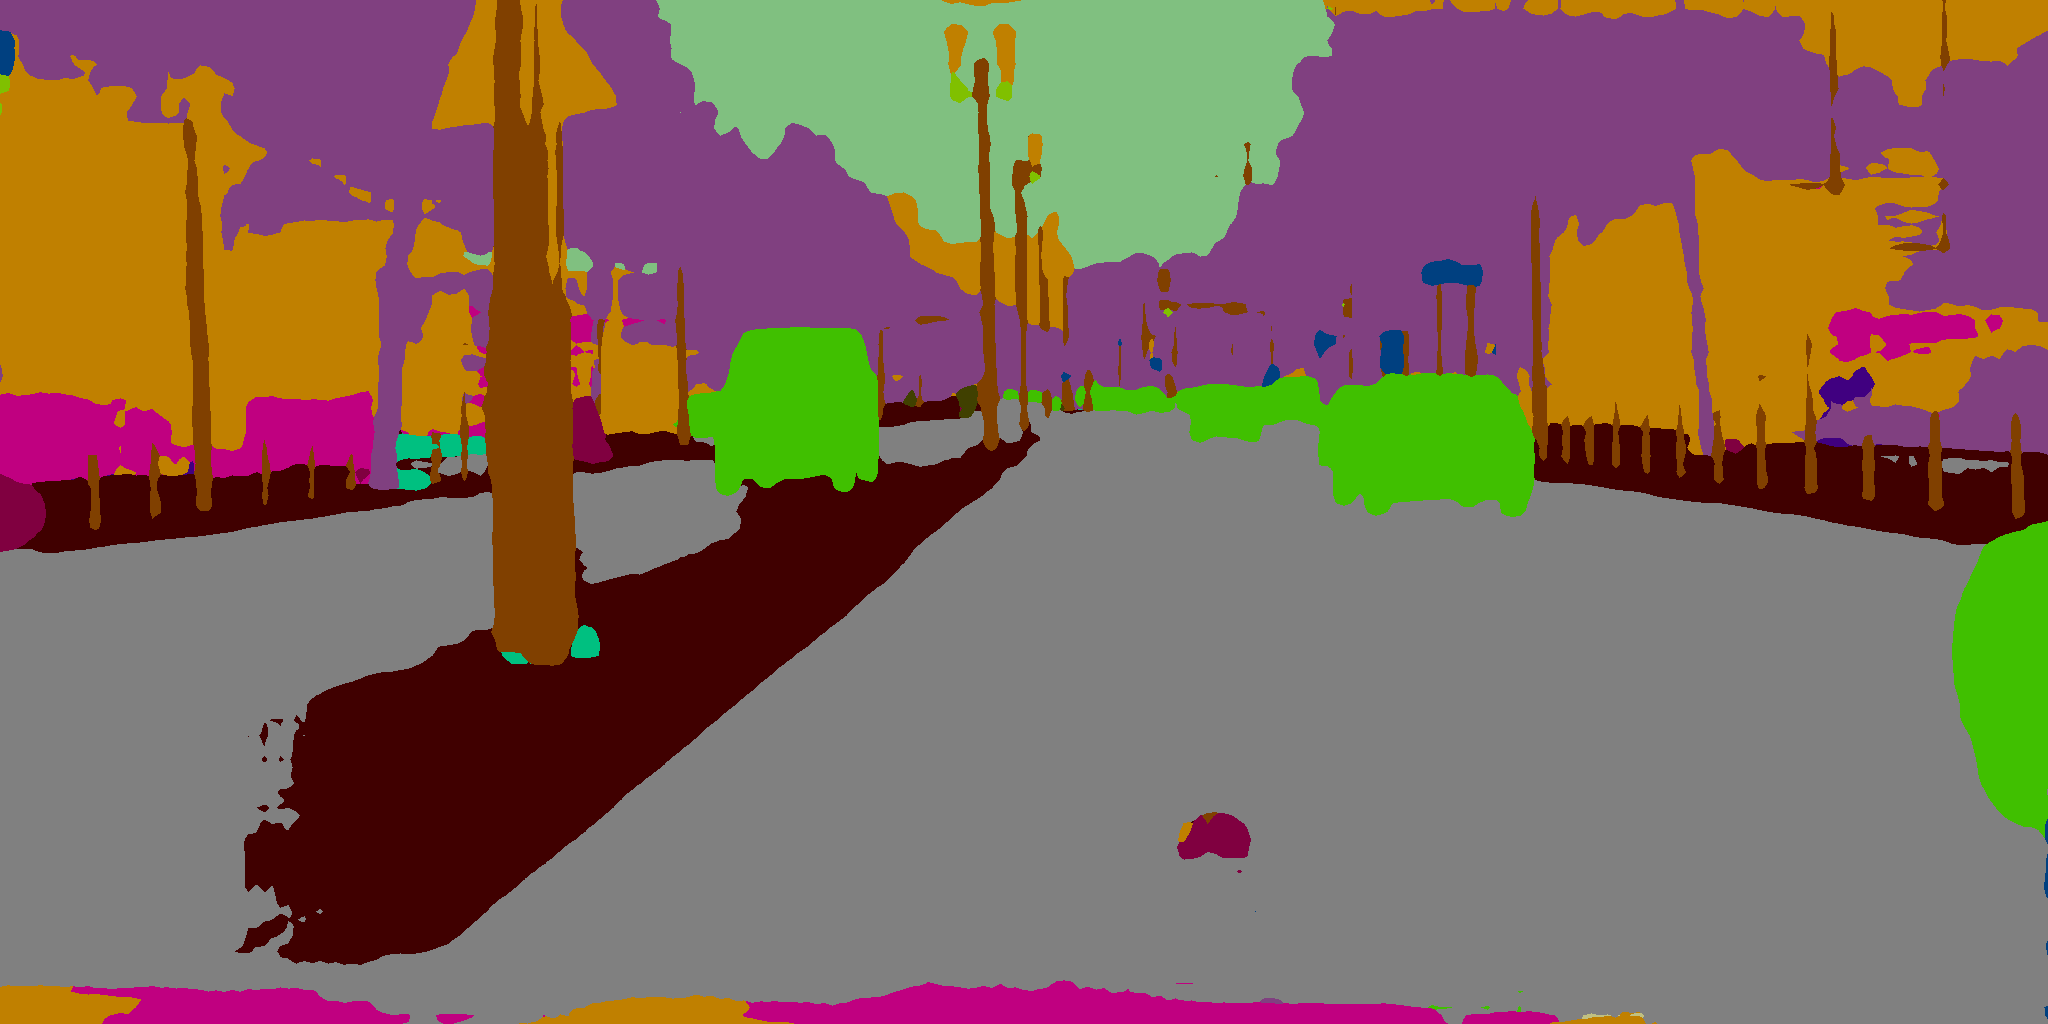

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/frankfurt_000000_016005_leftImg8bit.png


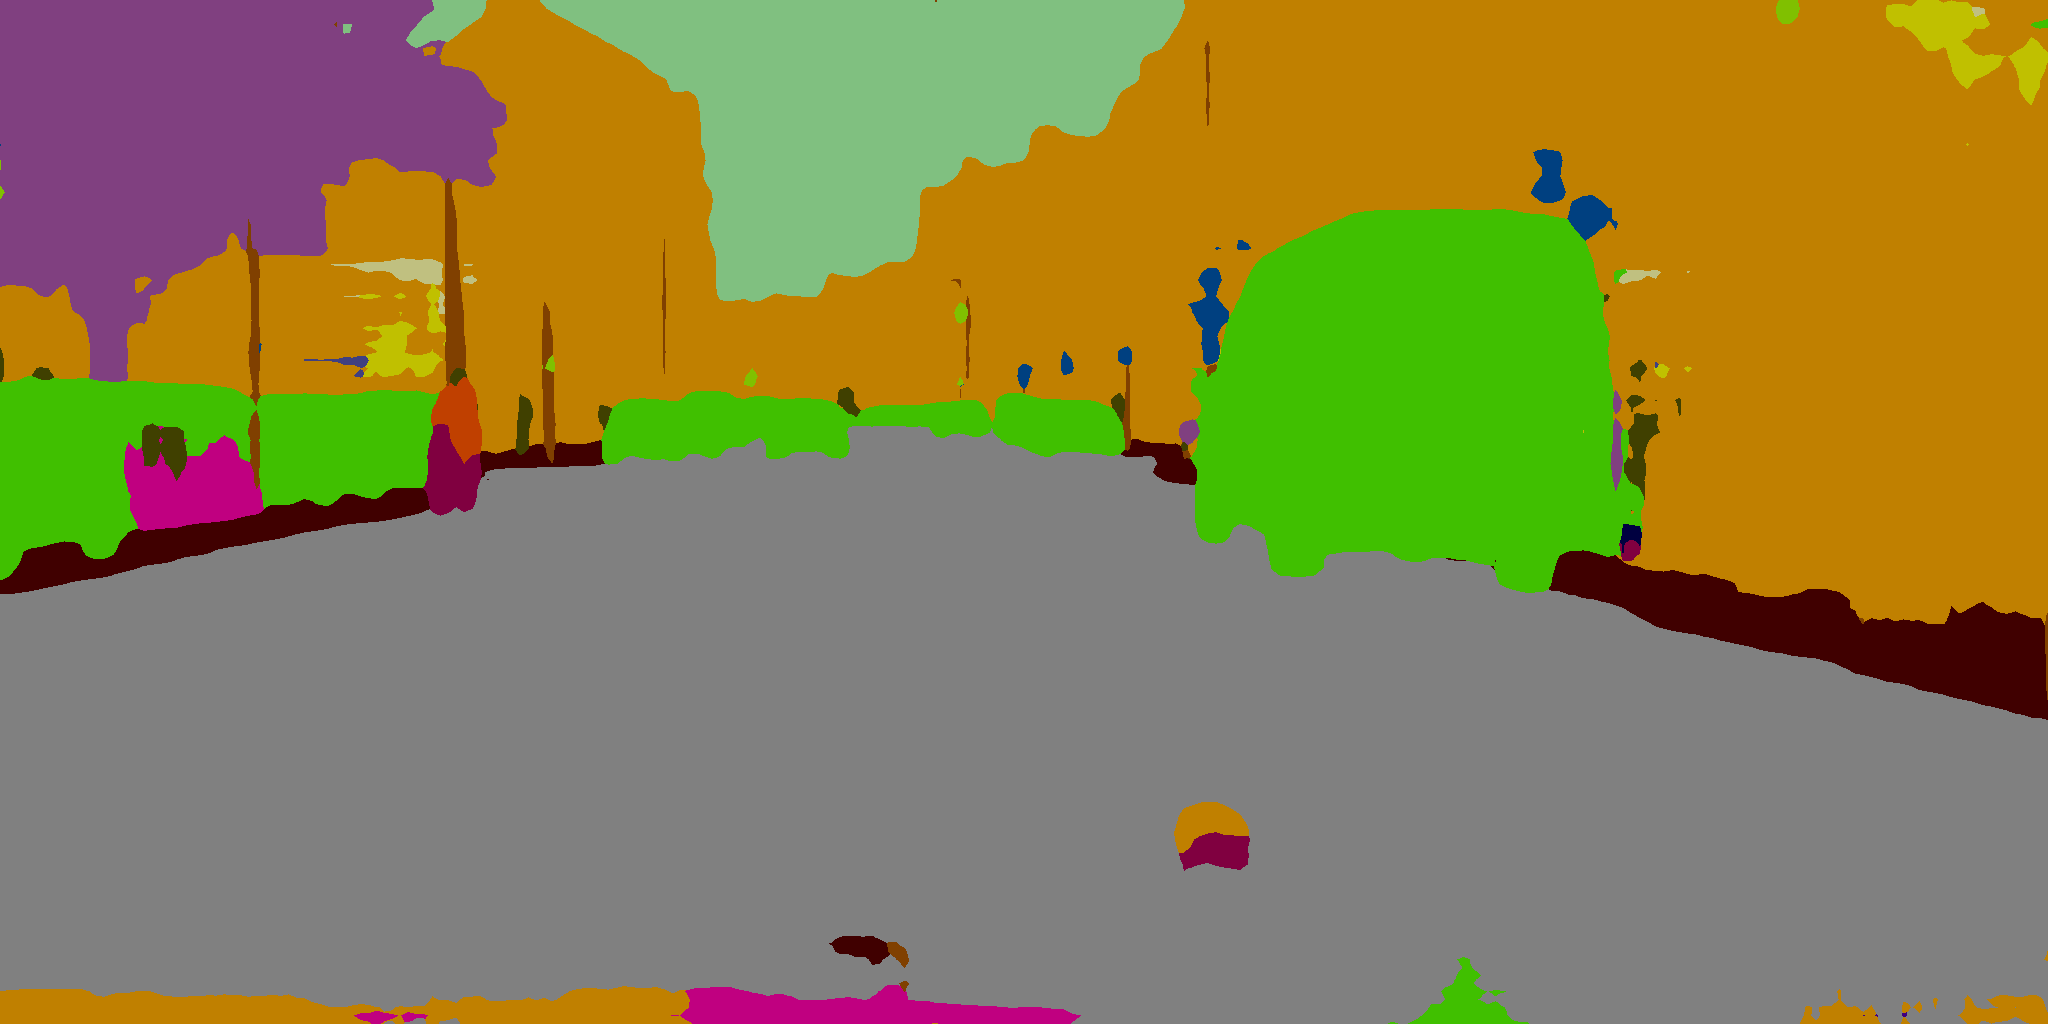

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/frankfurt_000000_001751_leftImg8bit.png


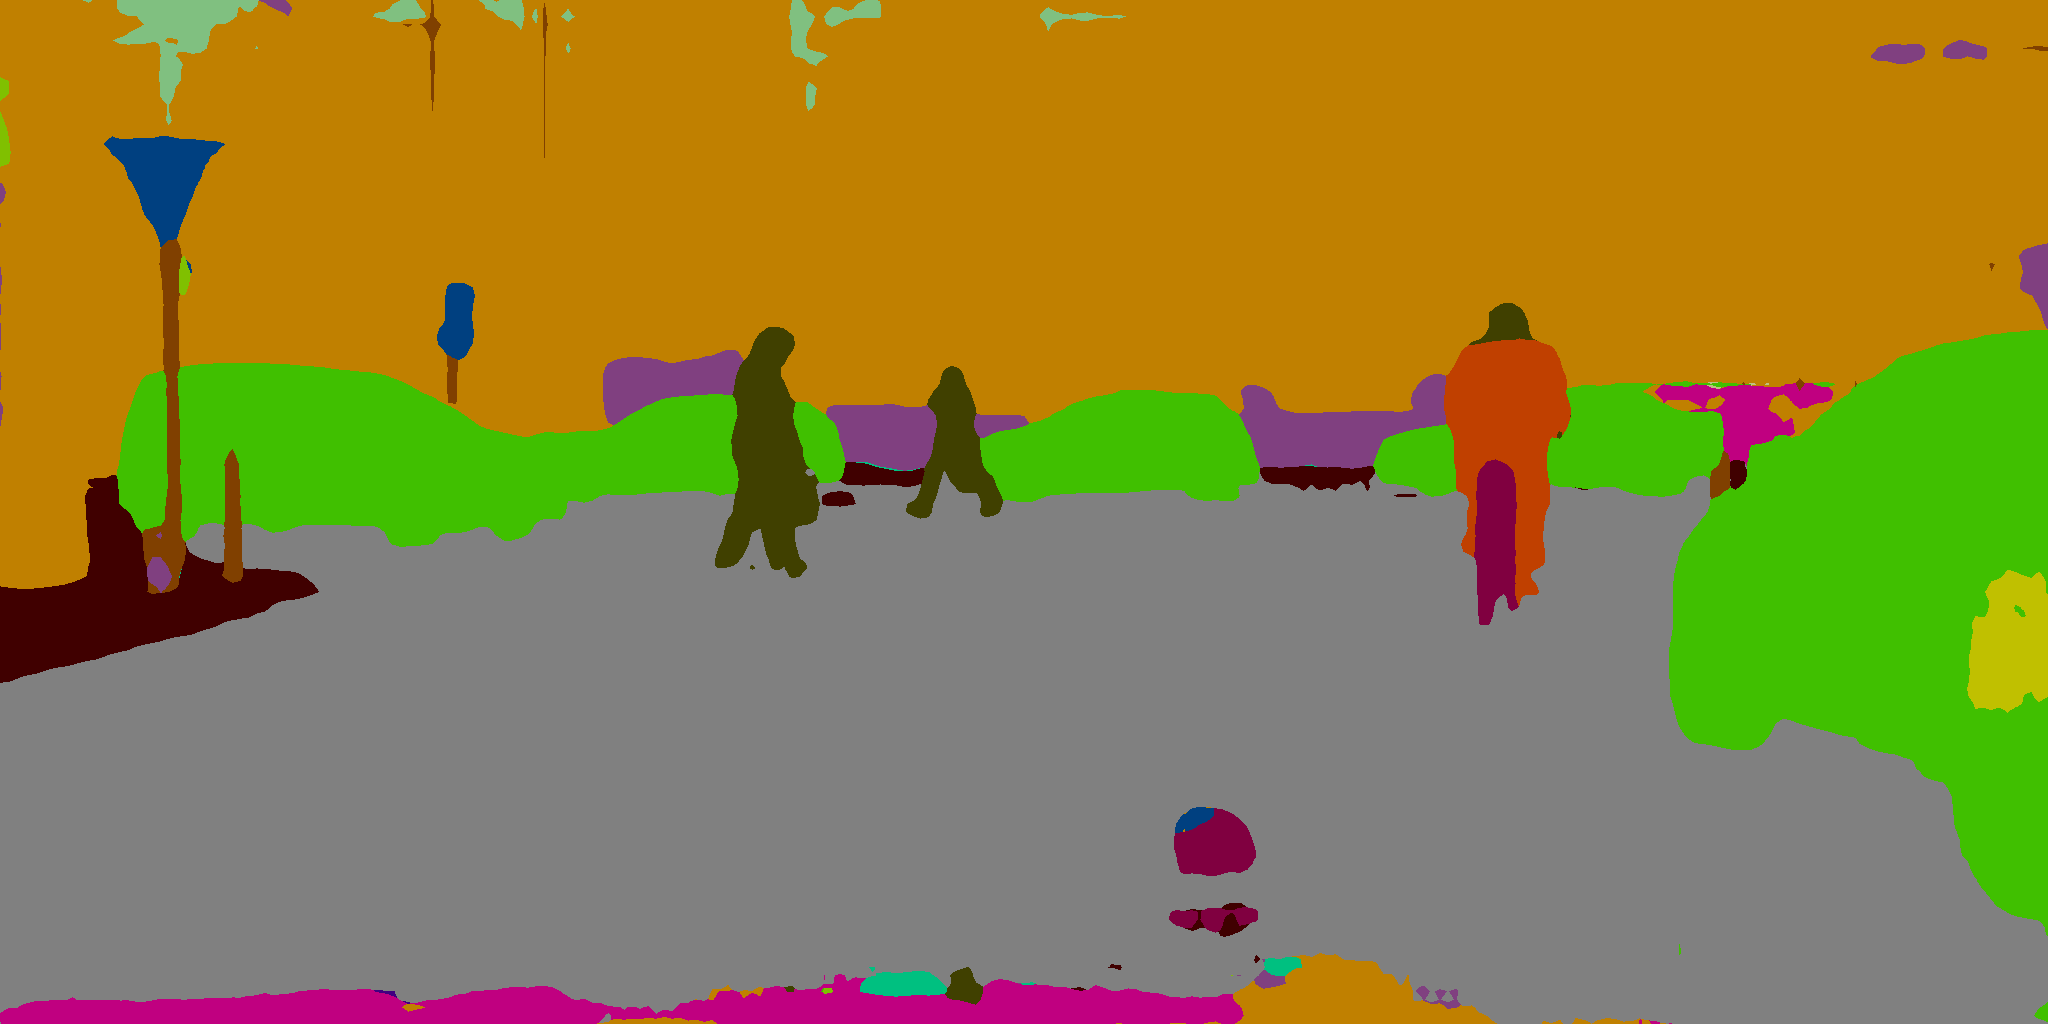

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/frankfurt_000000_001016_leftImg8bit.png


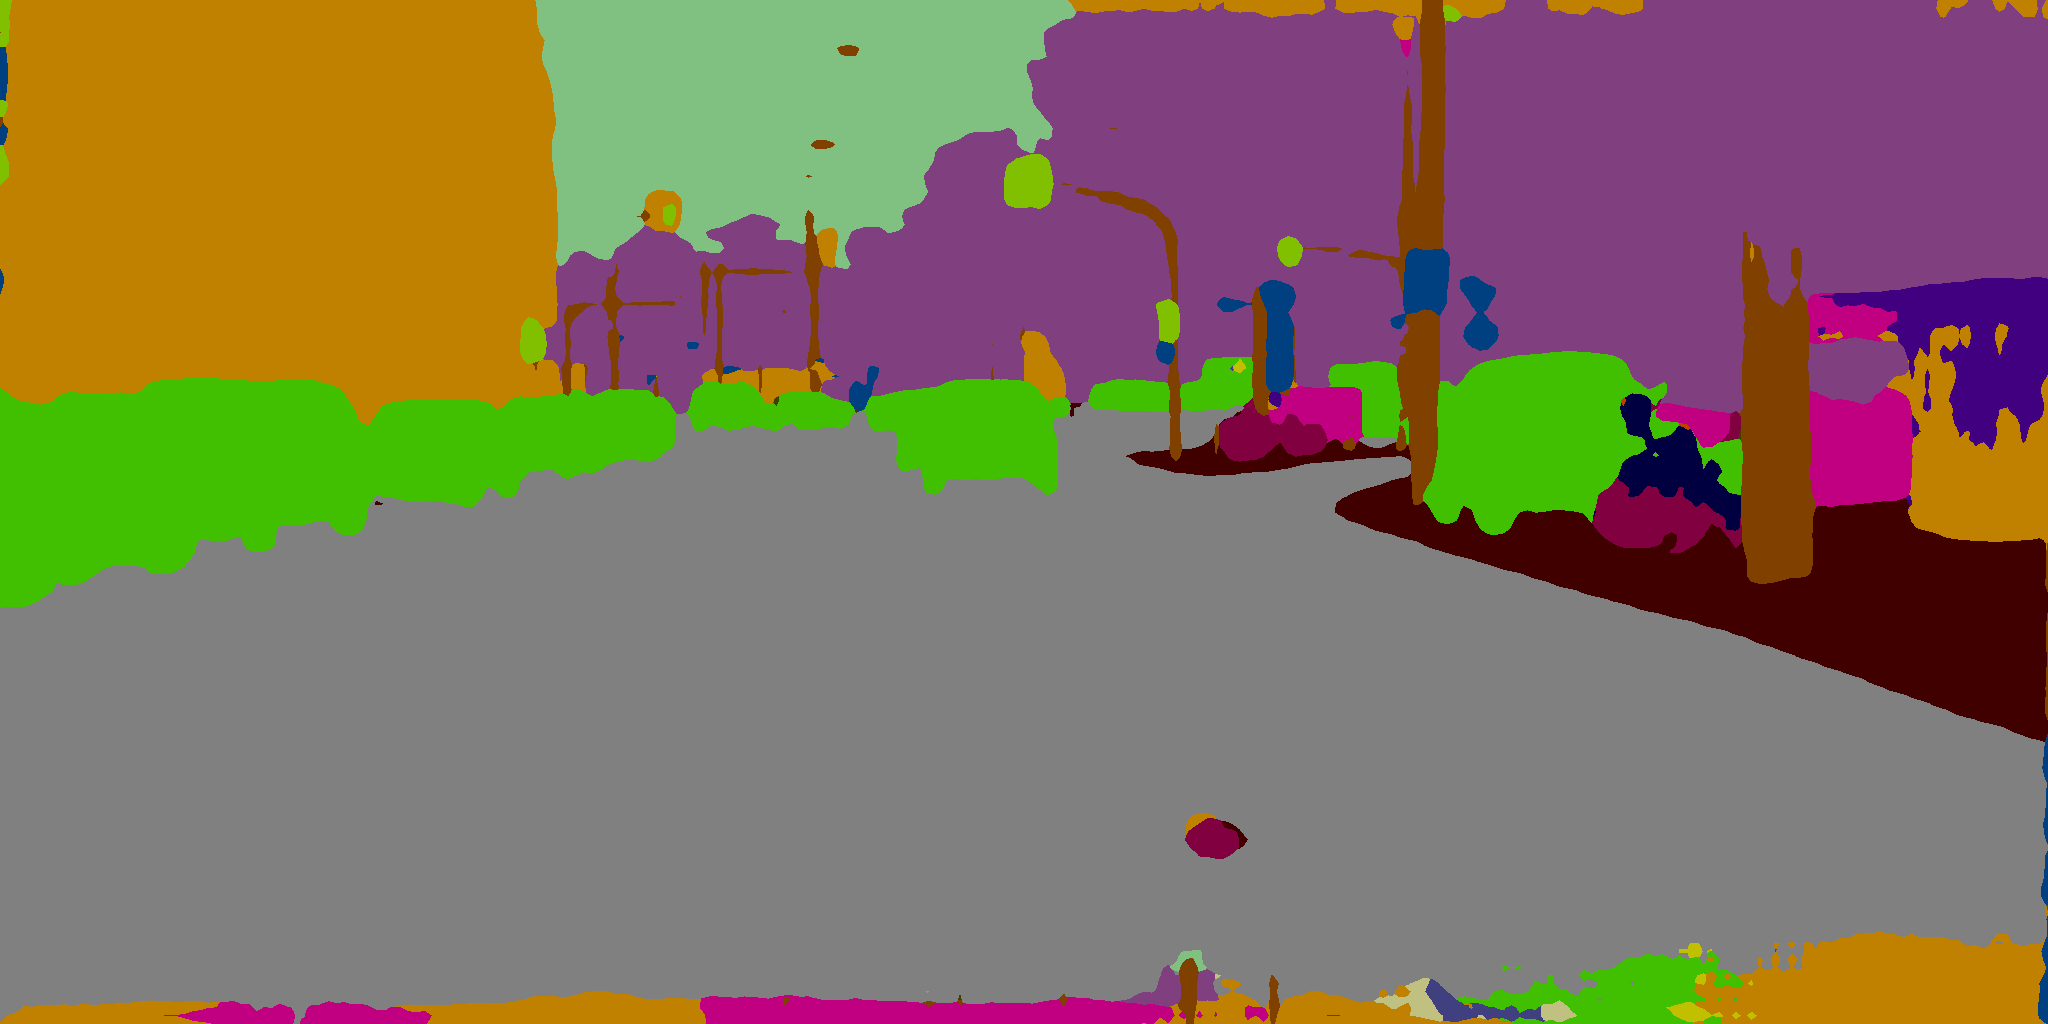

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/frankfurt_000000_002963_leftImg8bit.png


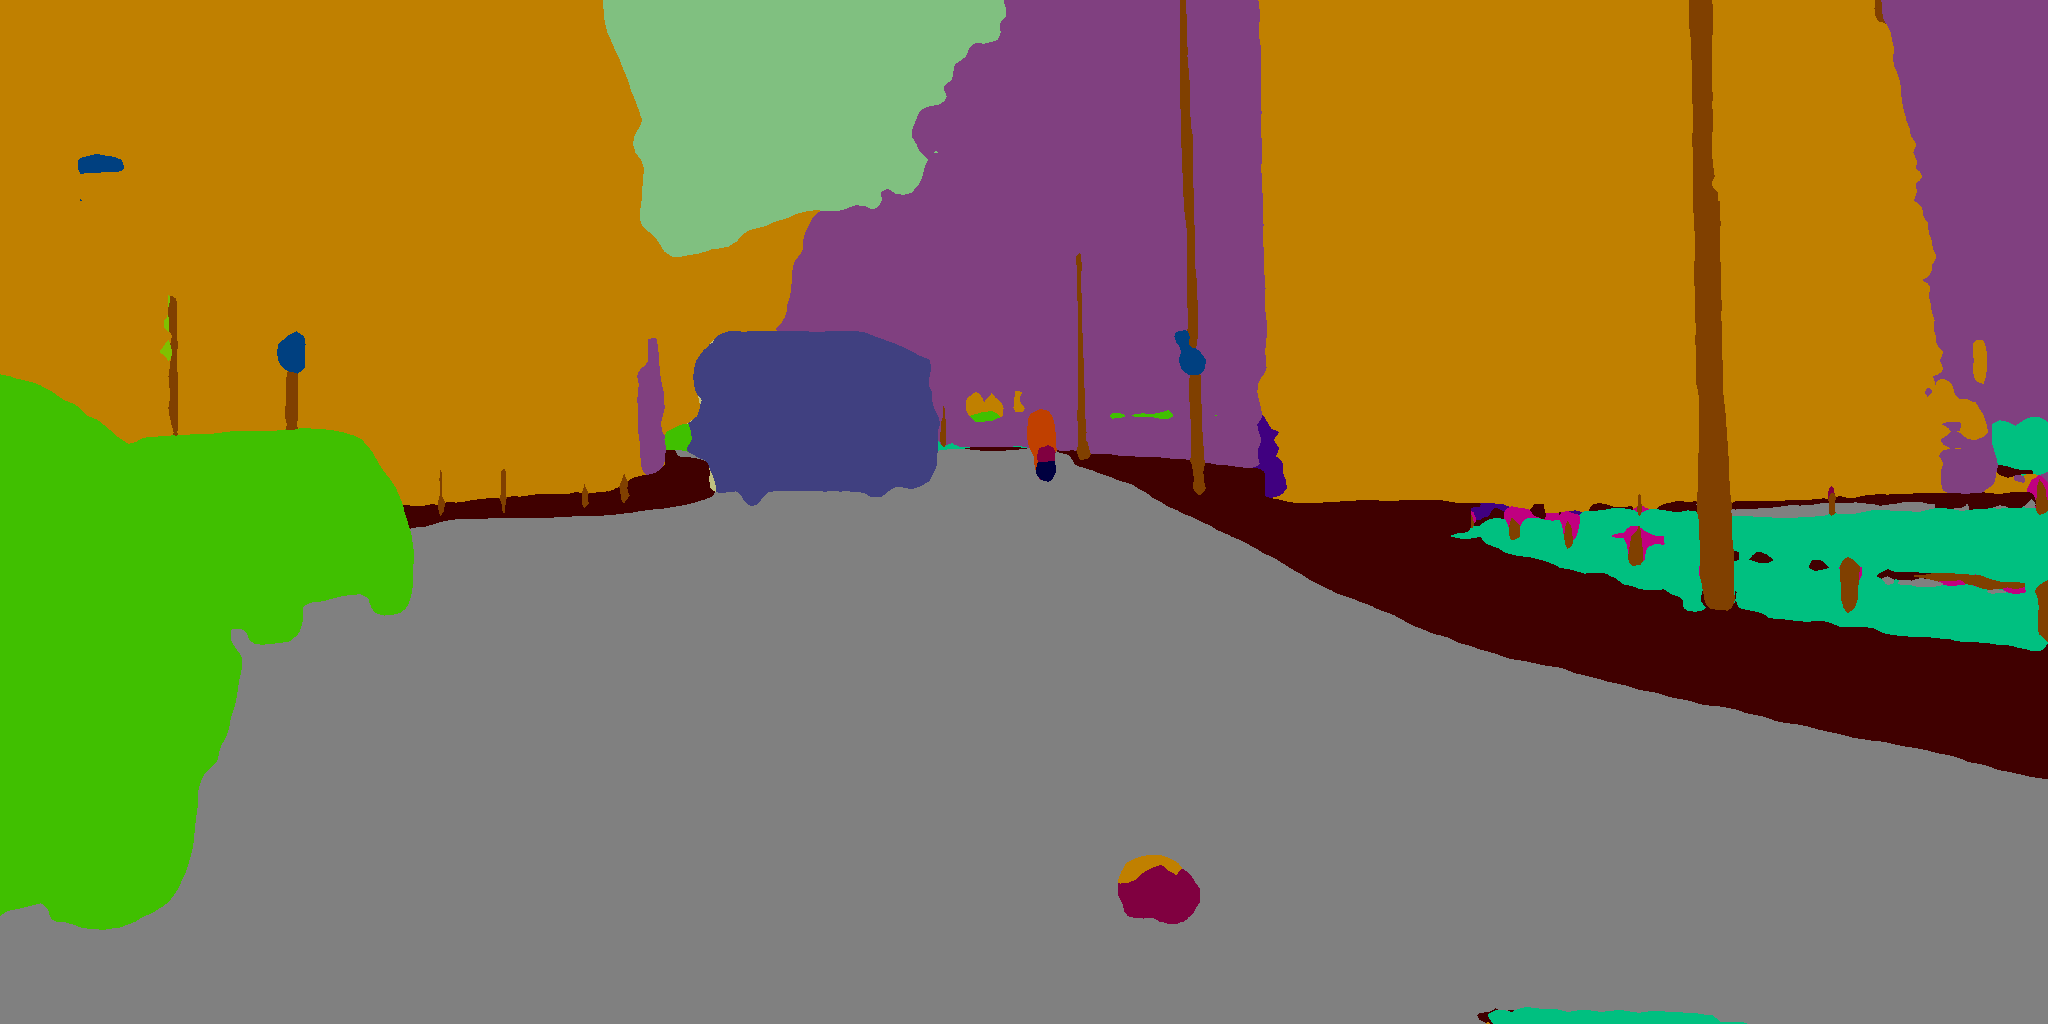

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/munster_000157_000019_leftImg8bit.png


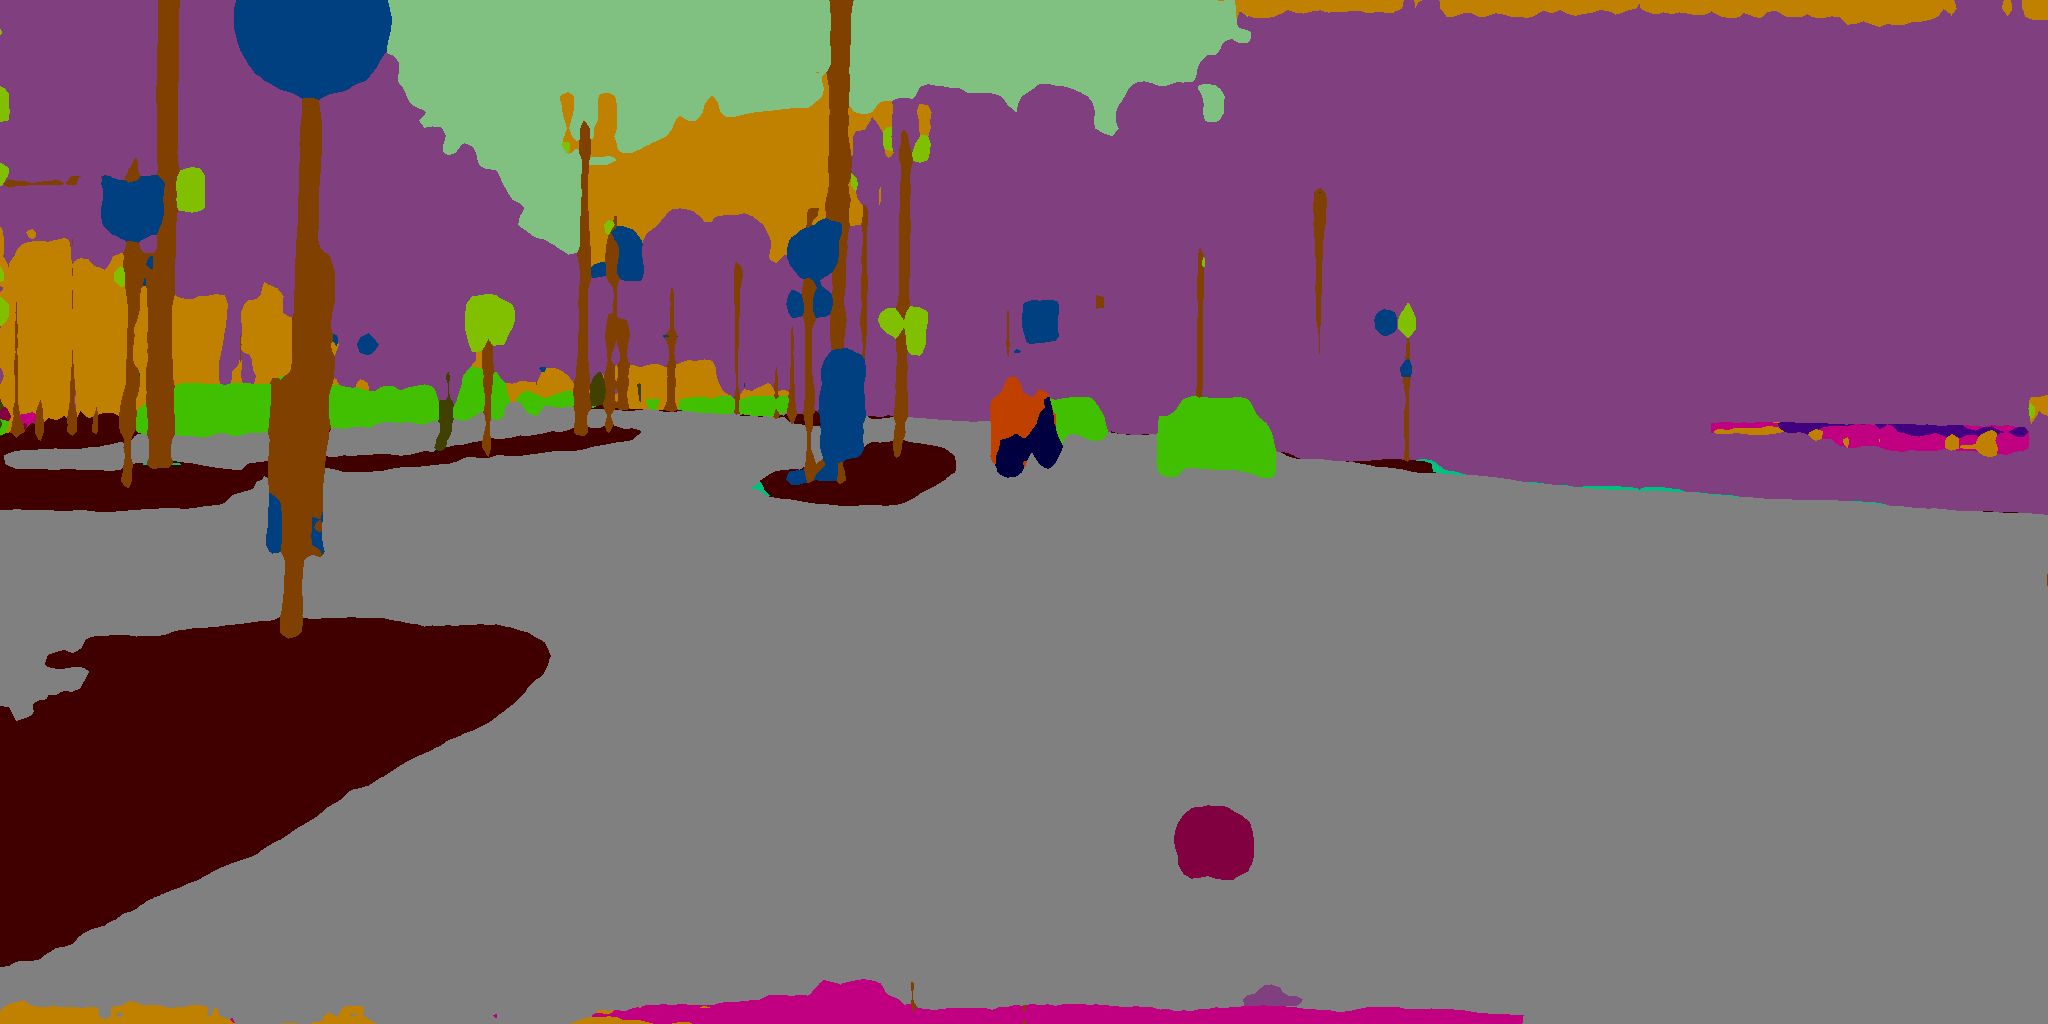

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/frankfurt_000000_017228_leftImg8bit.png


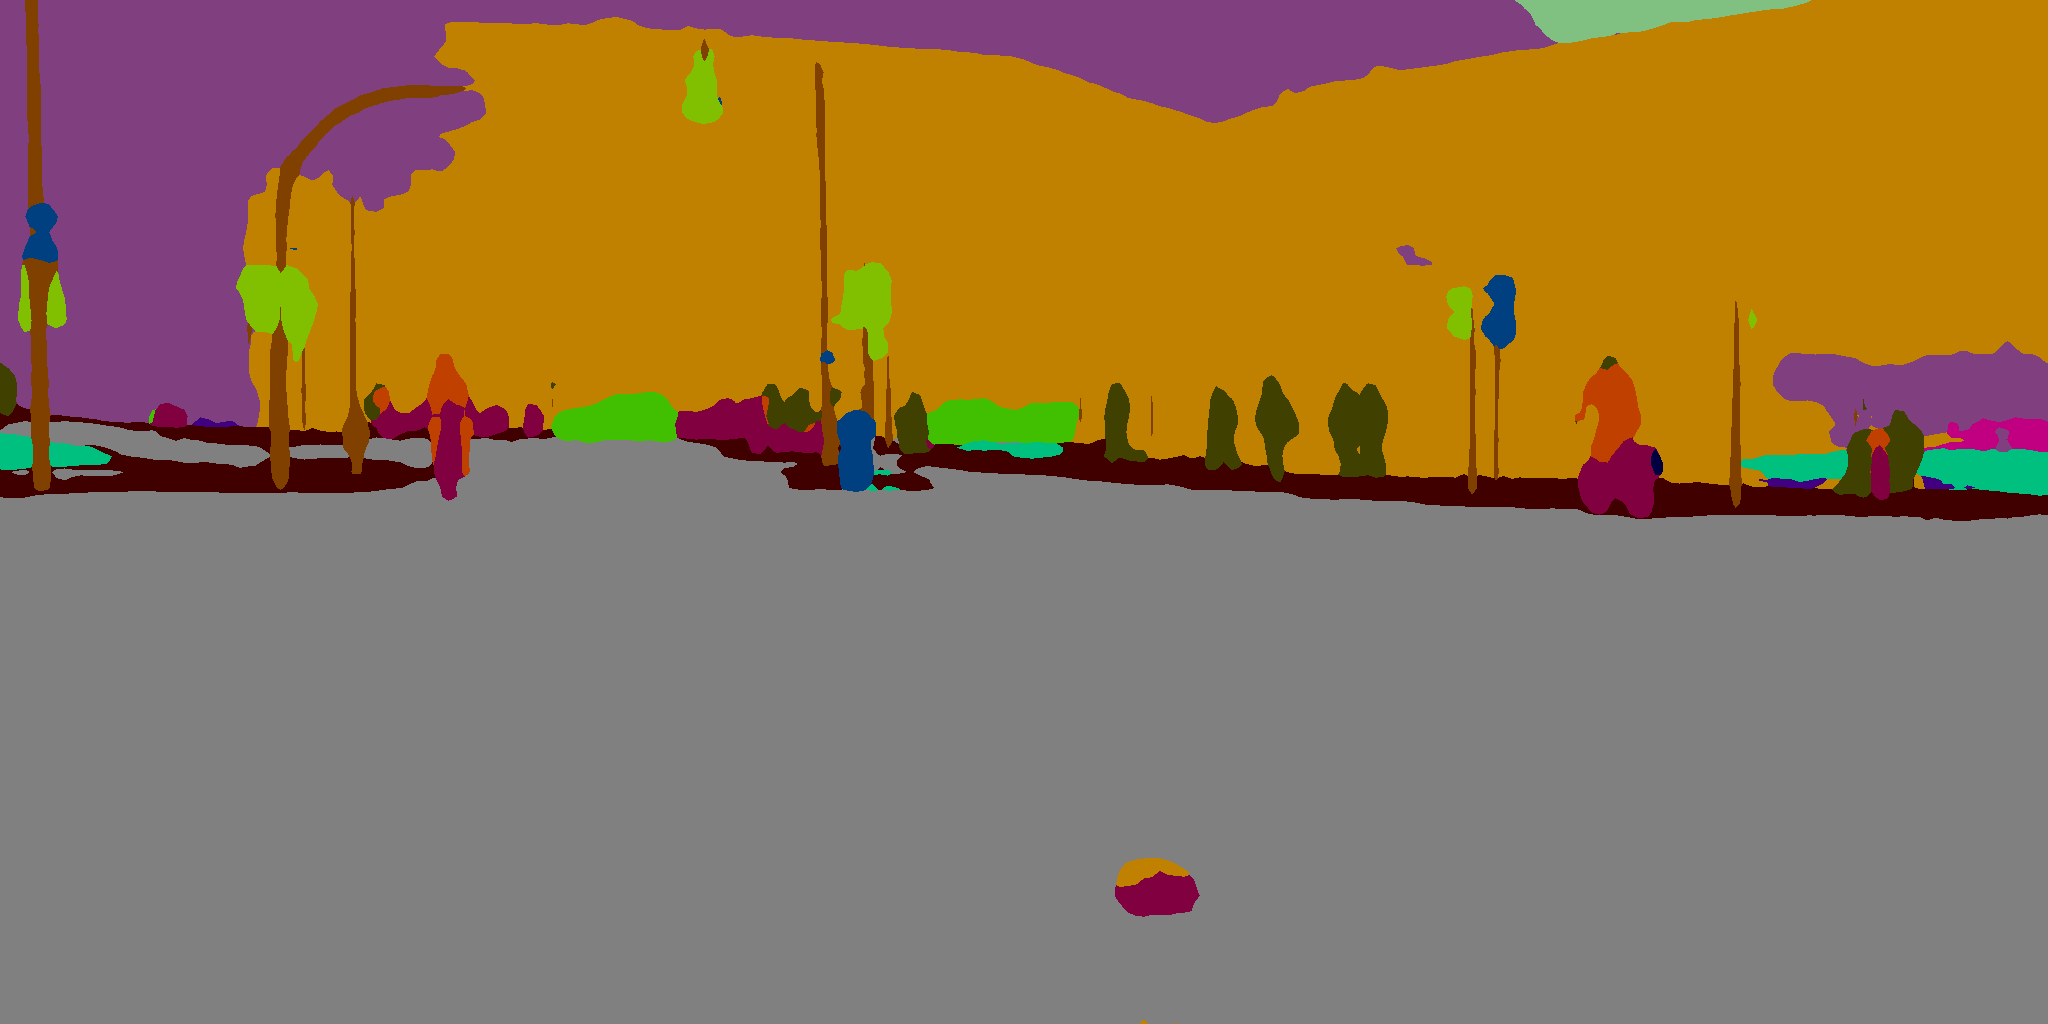

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/munster_000155_000019_leftImg8bit.png


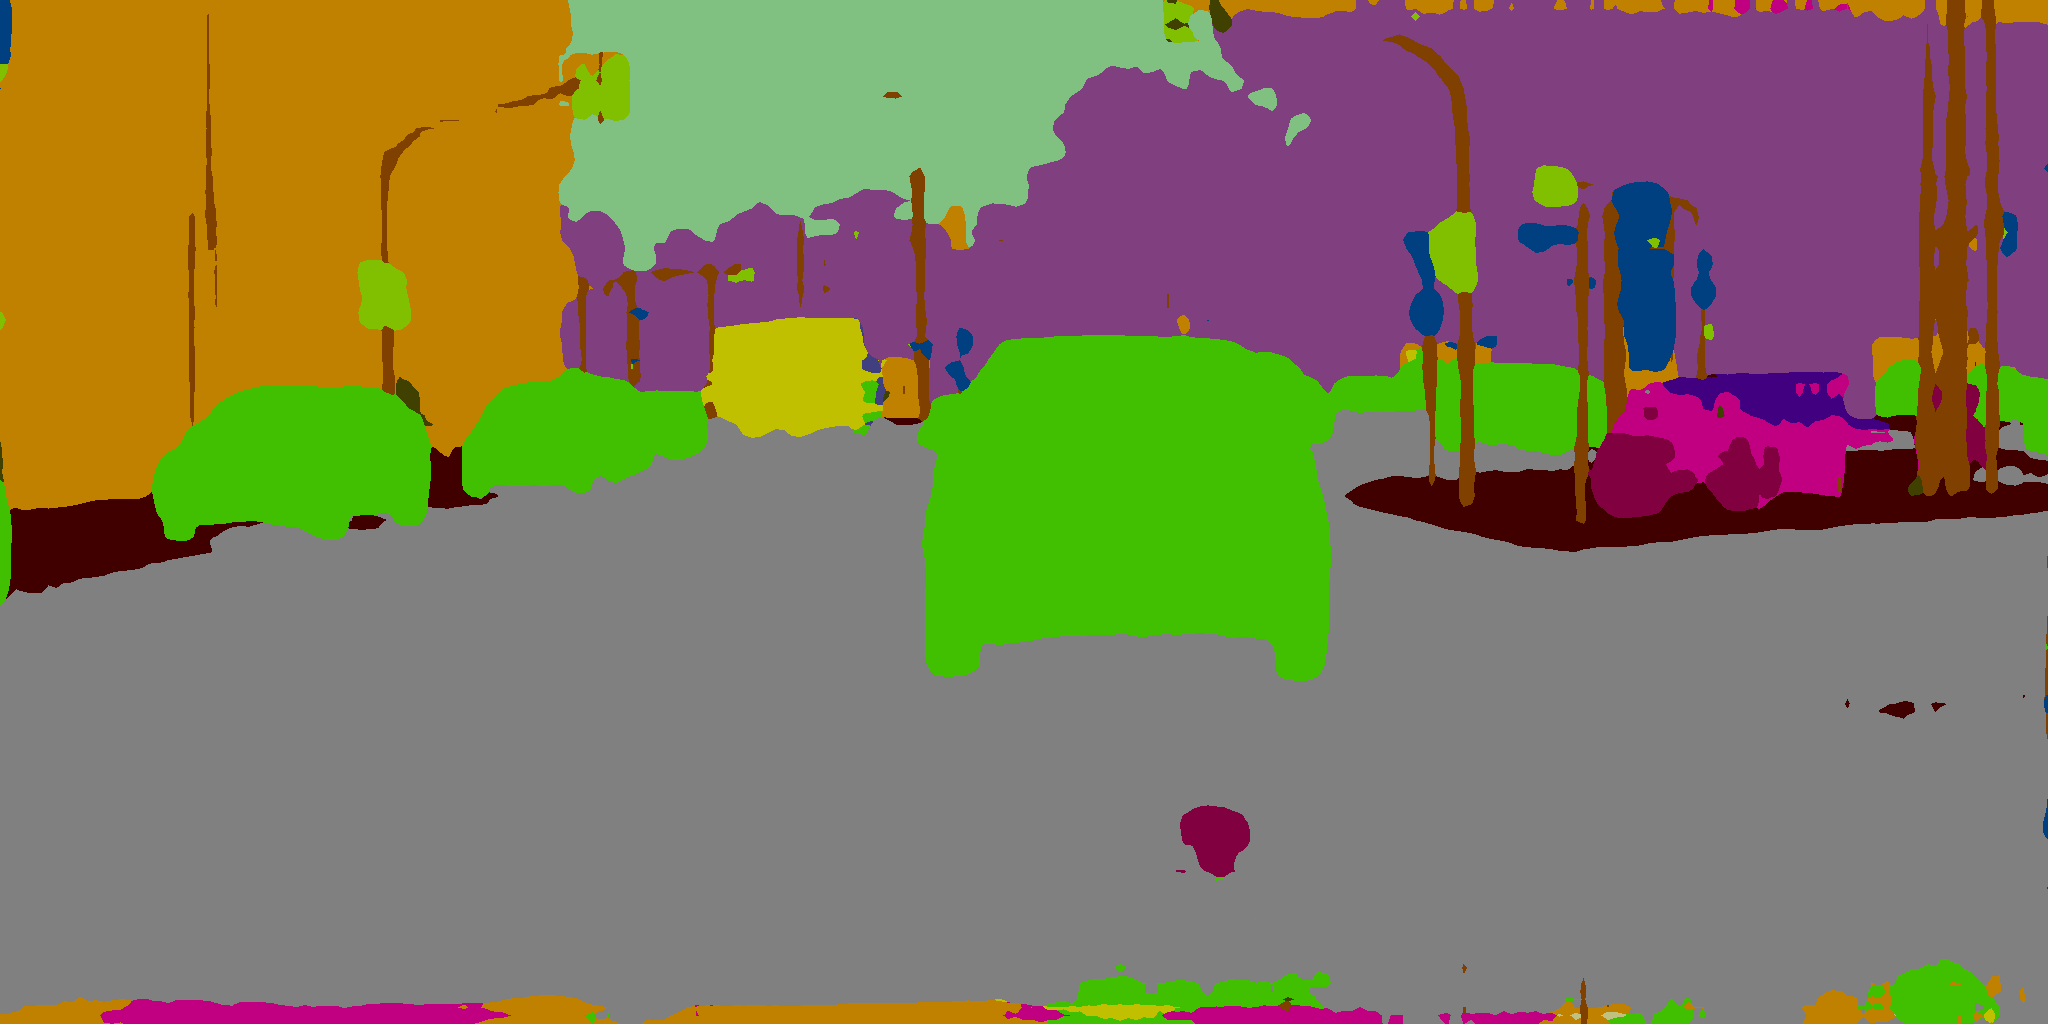

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/frankfurt_000000_003025_leftImg8bit.png


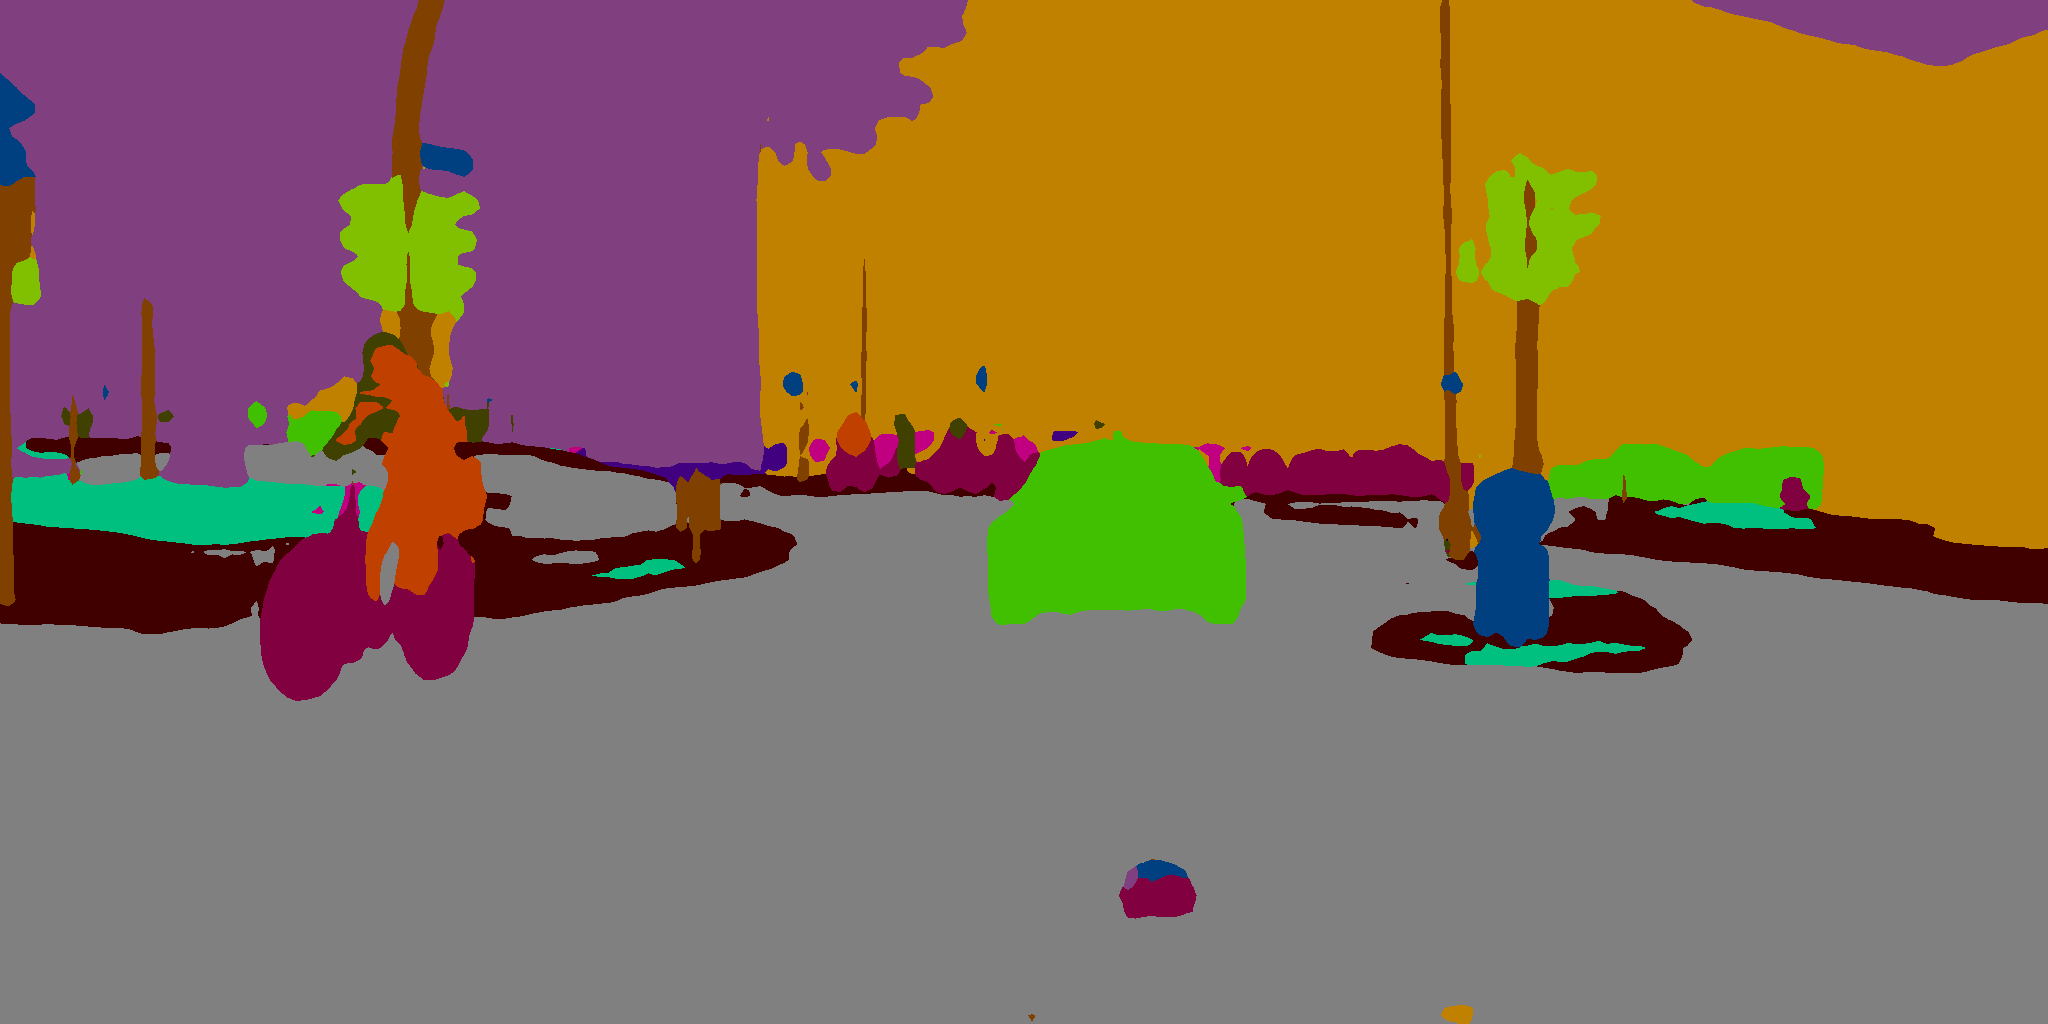

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/munster_000156_000019_leftImg8bit.png


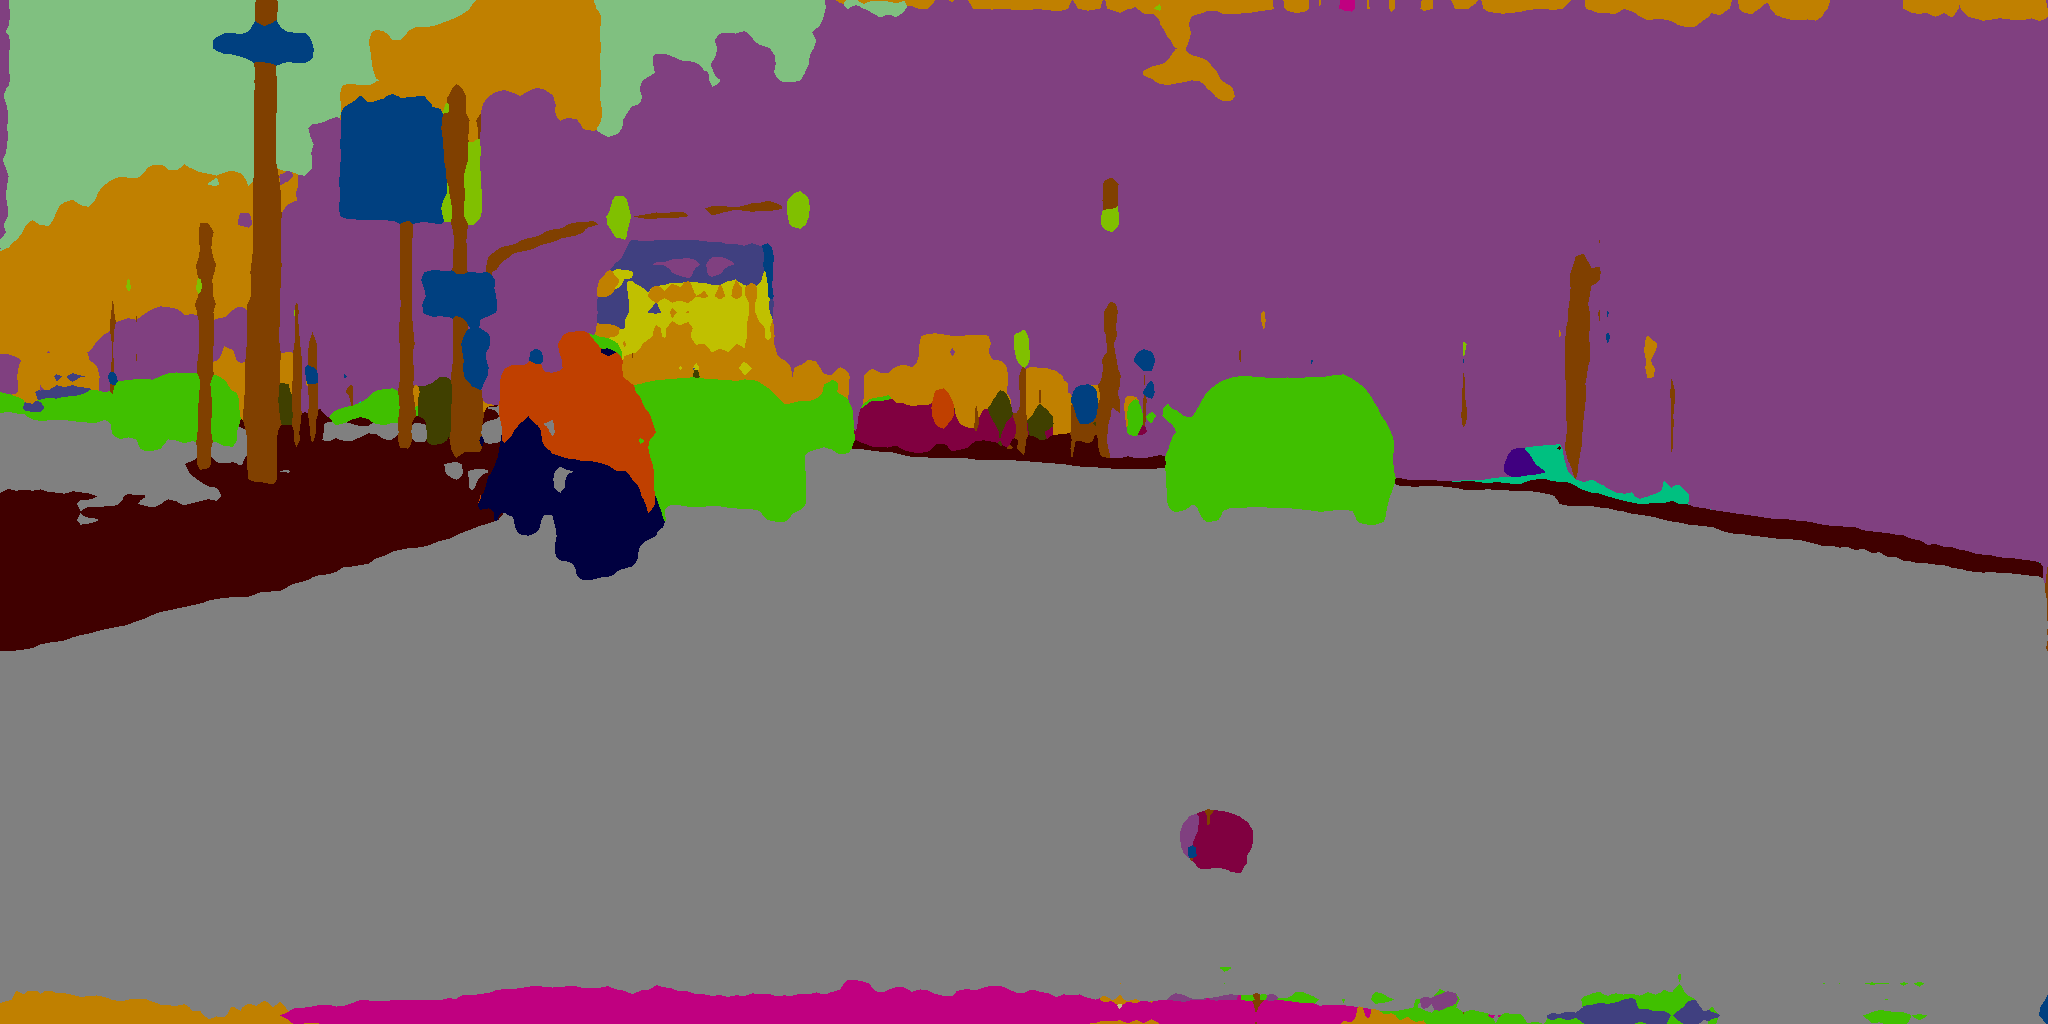

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/frankfurt_000000_017476_leftImg8bit.png


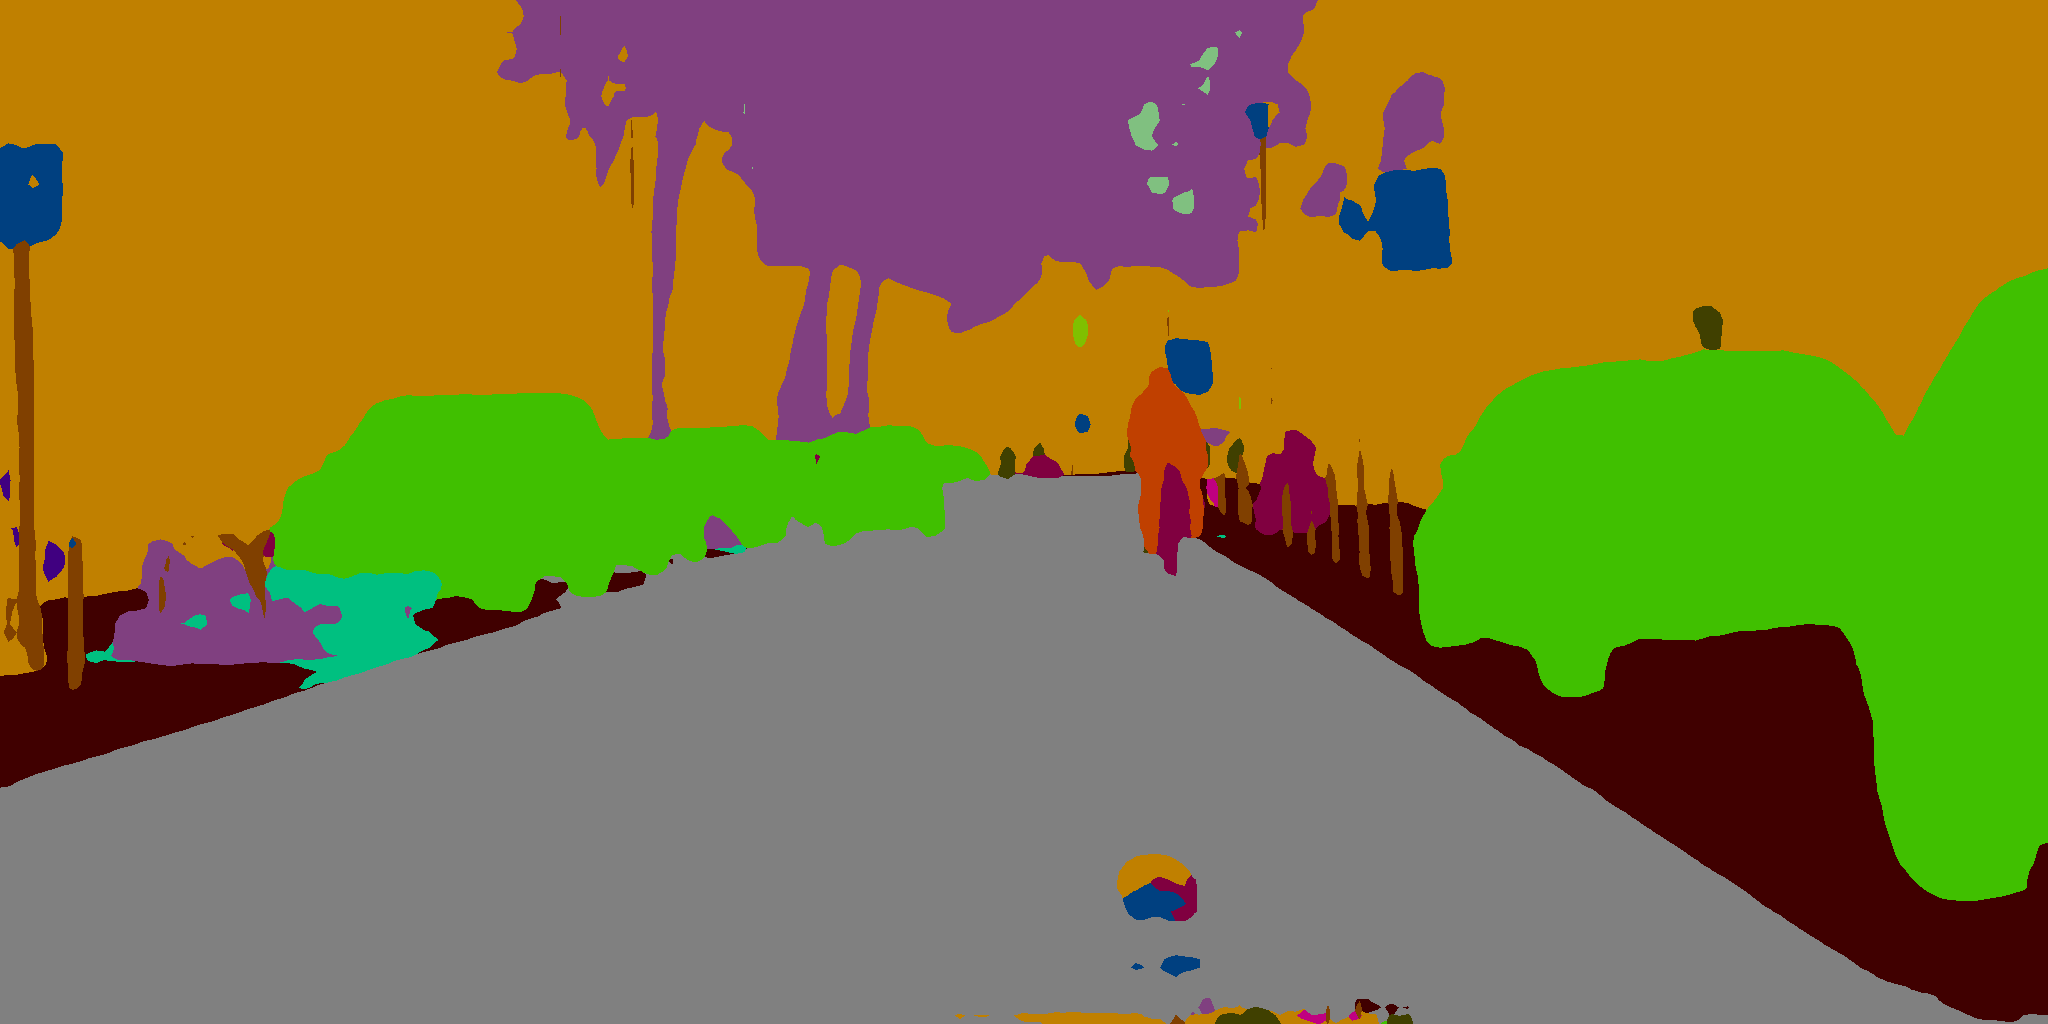

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/munster_000154_000019_leftImg8bit.png


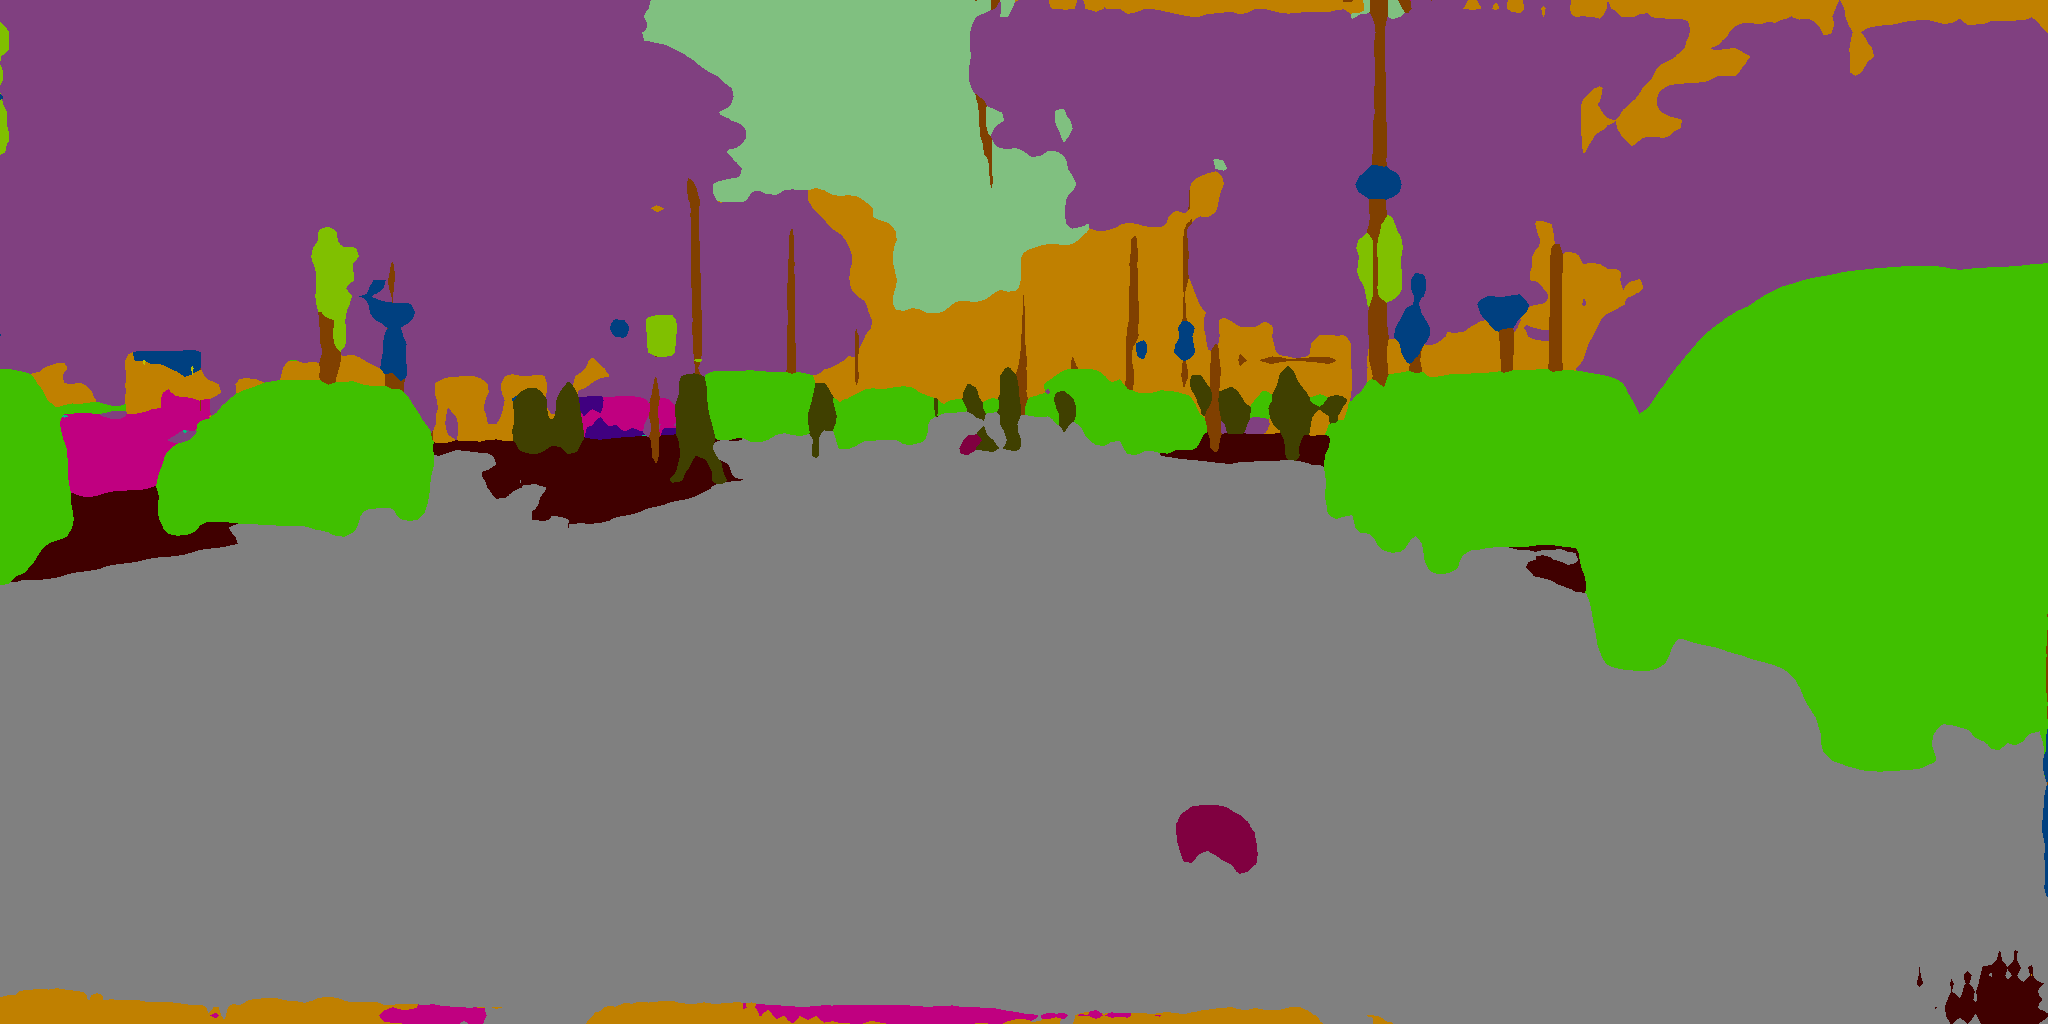

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/frankfurt_000000_001236_leftImg8bit.png


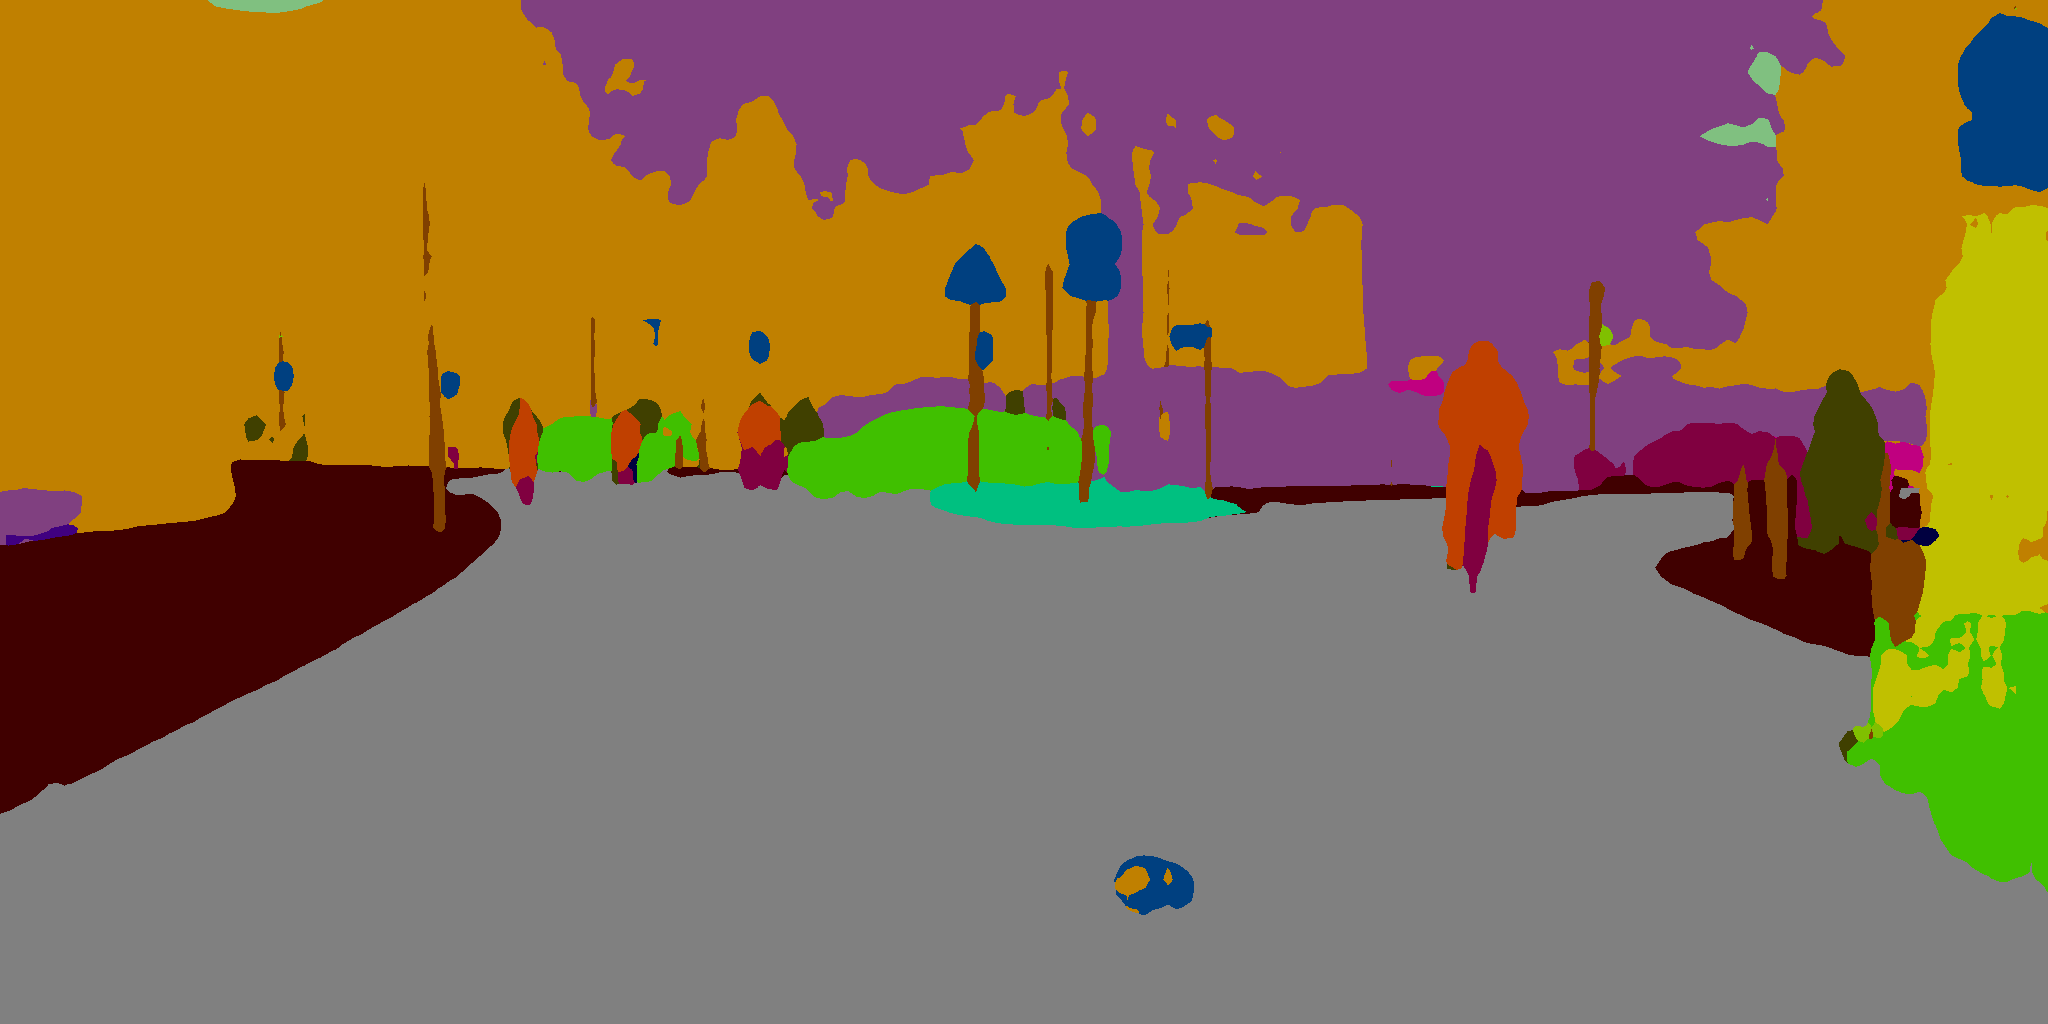

/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/munster_000153_000019_leftImg8bit.png


In [31]:
import glob
from IPython.display import Image, display
for imageName in glob.glob("/home/muditj/Desktop/MLIP/domain-adapt/OCNet/output/visualize/demo/*.png"): #assuming JPG
    display(Image(filename=imageName))
    print(imageName)
